In [1]:
import numpy as np
import math
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython
from IPython.display import Audio
from IPython.display import Image
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedGroupKFold
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
import seaborn as sn
import sklearn
from sklearn.manifold import TSNE
from torch.autograd import Function
from imblearn.metrics import sensitivity_specificity_support

In [2]:
DATA_PATH_Gita = os.path.abspath(os.getcwd()).split('Codigos')[0]+'Parkinson_datasets/Gita/Pataka'

SAMPLE_RATE = 44100
data_Gita = pd.DataFrame(columns=['Speaker_ID', 'Label', 'Path'])
Speaker_PD=0
Speaker_HC=50

for dirname, _, filenames in os.walk(DATA_PATH_Gita):
    
    for filename in filenames:
        file_path = os.path.join(dirname, filename)

        if dirname.find('PD')!=-1:
            Speaker_PD+=1
            Speaker_ID=Speaker_PD
            Label=1
        else: 
            Speaker_HC+=1
            Speaker_ID=Speaker_HC
            Label=0

            
        data_Gita=pd.concat([data_Gita, pd.DataFrame({"Speaker_ID": [Speaker_ID],
                            "Label": [Label],
                            "Path": [file_path]
                             })],ignore_index=True)
print("number of files is {}".format(len(data_Gita)))
data_Gita.head()

number of files is 100


,Speaker_ID,Label,Path
0,1,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
1,2,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
2,3,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
3,4,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
4,5,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...


In [3]:
#Load NeuroV
DATA_PATH_NeuroV = os.path.abspath(os.getcwd()).split('Codigos')[0]+'Parkinson_datasets/BDatos Neurovoz/PorMaterial_limpios1_2_downsized/PATAKA'

SAMPLE_RATE = 44100
data_NeuroV = pd.DataFrame(columns=['Speaker_ID', 'Label', 'Path'])
for dirname, _, filenames in os.walk(DATA_PATH_NeuroV):
    for filename in filenames:
            file_path = os.path.join(dirname, filename)
            if filename.find('wav')!=-1:
                identifiers=filename.split('.')[0].split('_')
                Speaker_ID=int(identifiers[2])+100
                if identifiers[0]=='PD':
                    Label=1
                else:
                    Label=0
            data_NeuroV=pd.concat([data_NeuroV, pd.DataFrame({"Speaker_ID": [Speaker_ID],
                            "Label": [Label],
                            "Path": [file_path]
                             })],ignore_index=True)
print("number of files is {}".format(len(data_NeuroV)))
data_NeuroV.head()


number of files is 86


,Speaker_ID,Label,Path
0,169,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
1,120,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
2,137,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
3,108,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
4,209,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...


In [4]:
DATA_PATH_German = os.path.abspath(os.getcwd()).split('Codigos')[0]+'Parkinson_datasets/GermanDB/DDKGER_resampled'

SAMPLE_RATE_German = 44100
data_German = pd.DataFrame(columns=['Speaker_ID', 'Label', 'Path'])
for dirname, _, filenames in os.walk(DATA_PATH_German):
    for filename in filenames:
            file_path = os.path.join(dirname, filename)
            identifiers=filename.split('.')[0].split('_')
            if dirname.find('PD')!=-1:
                Speaker_ID=int(identifiers[0])+300
                Label=1
            else: 
                Speaker_ID=int(identifiers[0])+300
                Label=0

            
            
            
            data_German=pd.concat([data_German, pd.DataFrame({"Speaker_ID": [Speaker_ID],
                            "Label": [Label],
                            "Path": [file_path]
                             })],ignore_index=True)
print("number of files is {}".format(len(data_German)))
data_German.head()

number of files is 175


,Speaker_ID,Label,Path
0,387,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
1,342,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
2,312,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
3,302,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
4,327,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...


In [5]:
#Load Czech
DATA_PATH_Czech = os.path.abspath(os.getcwd()).split('Codigos')[0]+'Parkinson_datasets/Czech/DDK'
SAMPLE_RATE_Czech = 44100

data_Czech = pd.DataFrame(columns=['Speaker_ID', 'Label', 'Path'])
for dirname, _, filenames in os.walk(DATA_PATH_Czech):
    
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        if (filename.find('wav') * filename.find('WAV'))!=-1:
            name=filename.split('.')[0]
            if name.find('a')!=-1:
                name=name.split('a')[0]
            if name.find('_')!=-1:
                name=name.split('_')[0]
            if name.find('b')!=-1:
                name=name.split('b')[0]
            identifiers= name  
            Speaker_ID=int(identifiers[2:])
            if identifiers[0:2]=='PN':
                Label=1
            else:
                Label=0
                Speaker_ID=Speaker_ID+500

            
            data_Czech=pd.concat([data_Czech, pd.DataFrame({"Speaker_ID": [Speaker_ID],
                            "Label": [Label],
                            "Path": [file_path]
                             })],ignore_index=True)
print("number of files is {}".format(len(data_Czech)))
data_Czech.head()

number of files is 200


,Speaker_ID,Label,Path
0,510,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
1,409,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
2,313,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
3,401,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...
4,503,1,/home/byo/Documents/Experiments_EmiroIbarra/Pa...


In [6]:
print('Data Gita')
print('Parkinson')
PD_Gita=data_Gita[data_Gita['Label']==1].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(PD_Gita)
print('size=', PD_Gita.shape)
print('Control')
HC_Gita=data_Gita[data_Gita['Label']==0].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(HC_Gita)
print('size=', HC_Gita.shape)

print('Data NeuroVoz')
print('Parkinson')
PD_NeuroV=data_NeuroV[data_NeuroV['Label']==1].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(PD_NeuroV)
print('size=', PD_NeuroV.shape)
print('Control')
HC_NeuroV=data_NeuroV[data_NeuroV['Label']==0].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(HC_NeuroV)
print('size=', HC_NeuroV.shape)

print('Data German')
print('Parkinson')
PD_German=data_German[data_German['Label']==1].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(PD_German)
print('size=', PD_German.shape)
print('Control')
HC_German=data_German[data_German['Label']==0].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(HC_German)
print('size=', HC_German.shape)

print('Data Czech')
print('Parkinson')
PD_Czech=data_Czech[data_Czech['Label']==1].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(PD_Czech)
print('size=', PD_Czech.shape)
print('Control')
HC_Czech=data_Czech[data_Czech['Label']==0].sort_values(by=['Speaker_ID'])['Speaker_ID'].unique()
print(HC_Czech)
print('size=', HC_Czech.shape)

Data Gita
Parkinson
[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50]
size= (50,)
Control
[51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
 99 100]
size= (50,)
Data NeuroVoz
Parkinson
[106 107 108 109 110 111 112 113 115 116 117 118 119 120 124 125 127 128
 129 130 131 132 133 135 137 138 139 140 141 142 143 144 146 147 166 168
 169 170 177 209 211 213 215 217]
size= (44,)
Control
[134 136 148 149 151 152 153 154 155 156 160 161 162 163 164 172 174 175
 176 181 182 185 186 205 212 216 218 220 222 228 230 231 232 234 236 237
 238 240 241 242 243 245]
size= (42,)
Data German
Parkinson
[301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354


In [7]:
#Partition Gita

Train_Subject_Gita=np.concatenate([PD_Gita, HC_Gita])
print("Data Gita")
print("To train:",np.unique(Train_Subject_Gita).shape)
data_train_Gita=data_Gita

#Partition NeuroVoz
Train_Subject_NeuroV=np.concatenate([PD_NeuroV, HC_NeuroV])
print("Data NeuroVoz")
print("To test:",np.unique(Train_Subject_NeuroV).shape)
data_train_NeuroV=data_NeuroV

#Partition NeuroVoz
Train_Subject_Czech=np.concatenate([PD_Czech, HC_Czech])
print("Data Czech")
print("To train:",np.unique(Train_Subject_Czech).shape)
data_train_Czech=data_Czech.loc[data_Czech['Speaker_ID'].isin(Train_Subject_Czech)]

Data Gita
To train: (100,)
Data NeuroVoz
To test: (86,)
Data Czech
To train: (99,)


In [8]:
#selecting 400ms overlap in 50ms of audio signal example
def process_select_signals(data, SAMPLE_RATE):
    time_leng=0.4
    sample_leng=int(time_leng*SAMPLE_RATE)
    overloap=2
    signals, y_label, subject_group, tono =[],[],[],[]


    #Processs data to train
    for data_ind, file_path in enumerate(data.Path):
        audio, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
        audio_len=len(audio)
        #print(audio_len)
        #plt.plot(audio)
        audio=audio/np.max(abs(audio))
        indx=[i for i,x in enumerate(np.sqrt(abs(audio))) if x>.30]
        segments=0
        if (indx[0]+sample_leng)<audio_len:
            for i in range(int((-indx[0]+indx[len(indx)-1])/(sample_leng/overloap))):
                ind_start = i * int(sample_leng/overloap)+indx[0]
                ind_end = ind_start + sample_leng
                if ind_end <= indx[len(indx)-1]:
                    signal=np.zeros(sample_leng)
                    signal = audio[ind_start:int(ind_end)]
                    signals.append(signal)
            
                    y_label.append(data.iloc[data_ind]['Label'])
                    subject_group.append(data.iloc[data_ind]['Speaker_ID'])
                    segments=segments+1
            print(" Processed {}/{} files".format(data_ind,len(data)-1),end='')
            print(" Time audio: {} Segments {} ".format((audio_len-1)/sample_rate,segments))
        else:
             print(" Processed {}/{} files".format(data_ind,len(data)-1),end='')
             print(" Time audio: {} Segments {} ".format((audio_len-1)/sample_rate,0))
    signals = np.stack(signals,axis=0)
    y_label = np.stack(y_label,axis=0)
    subject_group = np.stack(subject_group,axis=0)
    return signals, y_label, subject_group

In [9]:
signals_train_Gita, y_label_train_Gita, subject_group_train_Gita = process_select_signals(data_train_Gita, SAMPLE_RATE)
print('size data train', signals_train_Gita.shape)

signals_train_NeuroV, y_label_train_NeuroV, subject_group_train_NeuroV = process_select_signals(data_train_NeuroV, SAMPLE_RATE)
print('size data train', signals_train_NeuroV.shape)

signals_test_German, y_label_test_German, subject_group_test_German = process_select_signals(data_German, SAMPLE_RATE_German)
print('size data test', signals_test_German.shape)

signals_test_Czech, y_label_test_Czech, subject_group_test_Czech = process_select_signals(data_Czech, SAMPLE_RATE_Czech)
print('size data test', signals_test_Czech.shape)

 Processed 0/99 files Time audio: 2.519614512471655 Segments 10 
 Processed 1/99 files Time audio: 5.553083900226757 Segments 25 
 Processed 2/99 files Time audio: 1.9452380952380952 Segments 7 
 Processed 3/99 files Time audio: 2.5204761904761903 Segments 9 
 Processed 4/99 files Time audio: 4.17984126984127 Segments 19 
 Processed 5/99 files Time audio: 1.4207709750566893 Segments 5 
 Processed 6/99 files Time audio: 3.325034013605442 Segments 14 
 Processed 7/99 files Time audio: 4.467210884353742 Segments 20 
 Processed 8/99 files Time audio: 1.7343990929705215 Segments 7 
 Processed 9/99 files Time audio: 2.5707482993197277 Segments 11 
 Processed 10/99 files Time audio: 2.364512471655329 Segments 10 
 Processed 11/99 files Time audio: 6.068208616780045 Segments 28 
 Processed 12/99 files Time audio: 6.52859410430839 Segments 30 
 Processed 13/99 files Time audio: 2.7931519274376417 Segments 12 
 Processed 14/99 files Time audio: 4.131632653061224 Segments 19 
 Processed 15/99 fil

 Processed 25/85 files Time audio: 7.265124716553288 Segments 35 
 Processed 26/85 files Time audio: 11.032675736961451 Segments 53 
 Processed 27/85 files Time audio: 8.51047619047619 Segments 41 
 Processed 28/85 files Time audio: 7.806507936507937 Segments 37 
 Processed 29/85 files Time audio: 6.925215419501134 Segments 33 
 Processed 30/85 files Time audio: 8.445668934240363 Segments 40 
 Processed 31/85 files Time audio: 12.863718820861678 Segments 62 
 Processed 32/85 files Time audio: 14.73766439909297 Segments 72 
 Processed 33/85 files Time audio: 14.364671201814058 Segments 70 
 Processed 34/85 files Time audio: 10.024807256235828 Segments 48 
 Processed 35/85 files Time audio: 6.00172335600907 Segments 28 
 Processed 36/85 files Time audio: 16.683718820861678 Segments 82 
 Processed 37/85 files Time audio: 11.23702947845805 Segments 54 
 Processed 38/85 files Time audio: 12.621655328798186 Segments 59 
 Processed 39/85 files Time audio: 3.9514739229024944 Segments 18 
 Proc

 Processed 62/174 files Time audio: 10.225873015873017 Segments 49 
 Processed 63/174 files Time audio: 6.670113378684808 Segments 30 
 Processed 64/174 files Time audio: 9.023605442176871 Segments 43 
 Processed 65/174 files Time audio: 4.306371882086168 Segments 20 
 Processed 66/174 files Time audio: 3.592108843537415 Segments 16 
 Processed 67/174 files Time audio: 5.723673469387755 Segments 26 
 Processed 68/174 files Time audio: 11.226621315192745 Segments 53 
 Processed 69/174 files Time audio: 4.461746031746031 Segments 20 
 Processed 70/174 files Time audio: 8.930680272108843 Segments 42 
 Processed 71/174 files Time audio: 7.481791383219955 Segments 35 
 Processed 72/174 files Time audio: 4.429727891156462 Segments 20 
 Processed 73/174 files Time audio: 28.400113378684807 Segments 140 
 Processed 74/174 files Time audio: 22.39281179138322 Segments 109 
 Processed 75/174 files Time audio: 14.136371882086168 Segments 68 
 Processed 76/174 files Time audio: 3.443605442176871 Se

 Processed 9/199 files Time audio: 9.123310657596372 Segments 44 
 Processed 10/199 files Time audio: 13.906984126984128 Segments 67 
 Processed 11/199 files Time audio: 3.5447845804988662 Segments 15 
 Processed 12/199 files Time audio: 3.356417233560091 Segments 14 
 Processed 13/199 files Time audio: 10.984875283446712 Segments 53 
 Processed 14/199 files Time audio: 5.863424036281179 Segments 27 
 Processed 15/199 files Time audio: 3.4984580498866213 Segments 15 
 Processed 16/199 files Time audio: 6.403696145124717 Segments 29 
 Processed 17/199 files Time audio: 4.4078004535147395 Segments 20 
 Processed 18/199 files Time audio: 12.116054421768707 Segments 56 
 Processed 19/199 files Time audio: 3.4094331065759635 Segments 14 
 Processed 20/199 files Time audio: 6.843718820861678 Segments 32 
 Processed 21/199 files Time audio: 4.64265306122449 Segments 20 
 Processed 22/199 files Time audio: 7.445600907029479 Segments 35 
 Processed 23/199 files Time audio: 7.962018140589569 Seg

 Processed 131/199 files Time audio: 4.213764172335601 Segments 19 
 Processed 132/199 files Time audio: 7.12984126984127 Segments 32 
 Processed 133/199 files Time audio: 4.682993197278911 Segments 22 
 Processed 134/199 files Time audio: 7.965895691609977 Segments 37 
 Processed 135/199 files Time audio: 4.730476190476191 Segments 22 
 Processed 136/199 files Time audio: 6.575510204081633 Segments 30 
 Processed 137/199 files Time audio: 6.515510204081632 Segments 30 
 Processed 138/199 files Time audio: 6.868344671201814 Segments 32 
 Processed 139/199 files Time audio: 5.369841269841269 Segments 24 
 Processed 140/199 files Time audio: 14.17673469387755 Segments 68 
 Processed 141/199 files Time audio: 8.93124716553288 Segments 42 
 Processed 142/199 files Time audio: 12.920181405895692 Segments 62 
 Processed 143/199 files Time audio: 6.285510204081633 Segments 29 
 Processed 144/199 files Time audio: 5.27609977324263 Segments 24 
 Processed 145/199 files Time audio: 5.53215419501

In [10]:
def compute_norm_spect(signals, sample_rate):
    n_fft = 2048
    win_length = int(0.015*sample_rate) 
    hop_length = int(0.010*sample_rate)
    n_mels = 65 

    mel_spectrogram = T.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=n_fft,
        win_length=win_length,
        hop_length=hop_length,
        center=True,
        pad_mode="reflect",
        power=2.0,
        norm="slaney",
        onesided=True,
        n_mels=n_mels,
        mel_scale="htk",
    )


    mel_spectrograms = []
    scaler = StandardScaler()
    print("Calculating mel spectrograms")
    for i in range(signals.shape[0]):
        mel_spect = librosa.power_to_db(mel_spectrogram(torch.from_numpy(signals[i,:])))
        mel_spect_norm=scaler.fit_transform(mel_spect)
        mel_spectrograms.append(mel_spect_norm)
        print("\r Processed {}/{} files".format(i,signals.shape[0]),end='')
    mel_spectrograms = np.stack(mel_spectrograms,axis=0)
    print(' ')
    return mel_spectrograms

In [11]:
mel_spectrograms_train_Gita=compute_norm_spect(signals_train_Gita, SAMPLE_RATE)
print('Data size:',mel_spectrograms_train_Gita.shape)

mel_spectrograms_train_NeuroV=compute_norm_spect(signals_train_NeuroV, SAMPLE_RATE)
print('Data size:',mel_spectrograms_train_NeuroV.shape)

mel_spectrograms_test_German=compute_norm_spect(signals_test_German, SAMPLE_RATE_German)
print('Data size:',mel_spectrograms_test_German.shape)

mel_spectrograms_test_Czech=compute_norm_spect(signals_test_Czech, SAMPLE_RATE_Czech)
print('Data size:',mel_spectrograms_test_Czech.shape)

Calculating mel spectrograms
 Processed 30/1962 files

/usr/local/anaconda3/lib/python3.10/site-packages/torchaudio/transforms/_transforms.py:611: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(


 Processed 1961/1962 files 
Data size: (1962, 65, 41)
Calculating mel spectrograms
 Processed 365/4985 files

/usr/local/anaconda3/lib/python3.10/site-packages/torchaudio/transforms/_transforms.py:611: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(


 Processed 716/4985 files

 Processed 4984/4985 files 
Data size: (4985, 65, 41)
Calculating mel spectrograms
 Processed 368/6547 files

/usr/local/anaconda3/lib/python3.10/site-packages/torchaudio/transforms/_transforms.py:611: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(


 Processed 6546/6547 files 
Data size: (6547, 65, 41)
Calculating mel spectrograms
 Processed 382/7250 files

/usr/local/anaconda3/lib/python3.10/site-packages/torchaudio/transforms/_transforms.py:611: UserWarning: Argument 'onesided' has been deprecated and has no influence on the behavior of this module.
  warnings.warn(


 Processed 723/7250 files

 Processed 7249/7250 files 
Data size: (7250, 65, 41)


In [12]:
def splitIntoChunks(mel_spect, y_label, subject_group):
    time_dis=7
    mel_chunked, y_label_chunked, subject_group_chunked,  seq_length = [],[],[],[]

    for i, speaker in enumerate(np.unique(subject_group)):
        
            index=np.where(subject_group==speaker)
            mel_spec_speaker=mel_spect[index]
            
        
            frames, heigth, width =np.shape(mel_spec_speaker)
        
            for time in range(math.ceil(frames/time_dis+0.5)):
                chunks=np.zeros([time_dis, heigth, width])
        
                if (time+1)*time_dis<=frames:
                    chunks = mel_spec_speaker[time*time_dis:(time+1)*time_dis,:,:]
                    mel_chunked.append(chunks)
                    y_label_chunked.append(y_label[index[0][0]])
                    subject_group_chunked.append(speaker)
                    seq_length.append(time_dis)
                    
                elif frames-time*time_dis>0:
                    chunks[0:frames-time*time_dis,:,:] = mel_spec_speaker[time*time_dis:frames,:,:]
                    mel_chunked.append(chunks)
                    y_label_chunked.append(y_label[index[0][0]])
                    subject_group_chunked.append(speaker)
                    seq_length.append(frames-time*time_dis)
    return np.stack(mel_chunked,axis=0), np.stack(y_label_chunked,axis=0),  np.stack(subject_group_chunked,axis=0), np.stack(seq_length,axis=0)


In [13]:
mel_train_chunked_Gita,  y_label_train_chunked_Gita, subject_group_train_chunked_Gita,seq_length_train_Gita  = splitIntoChunks(mel_spectrograms_train_Gita, y_label_train_Gita,  subject_group_train_Gita)
print('Gita Train Data size:',mel_train_chunked_Gita.shape)


mel_train_chunked_NeuroV,  y_label_train_chunked_NeuroV, subject_group_train_chunked_NeuroV, seq_length_train_NeuroV  = splitIntoChunks(mel_spectrograms_train_NeuroV, y_label_train_NeuroV,  subject_group_train_NeuroV)
print('NeuroV Train Data size:',mel_train_chunked_NeuroV.shape)  


mel_test_chunked_German,  y_label_test_chunked_German, subject_group_test_chunked_German, seq_length_test_German  = splitIntoChunks(mel_spectrograms_test_German, y_label_test_German,  subject_group_test_German)
print('German Test Data size:',mel_test_chunked_German.shape)

mel_test_chunked_Czech,  y_label_test_chunked_Czech, subject_group_test_chunked_Czech, seq_length_test_Czech  = splitIntoChunks(mel_spectrograms_test_Czech, y_label_test_Czech,  subject_group_test_Czech)
print('Czech Test Data size:',mel_test_chunked_Czech.shape)



Gita Train Data size: (325, 7, 65, 41)
NeuroV Train Data size: (748, 7, 65, 41)
German Test Data size: (1016, 7, 65, 41)
Czech Test Data size: (1077, 7, 65, 41)


In [14]:
class TimeDistributed(nn.Module):
    def __init__(self, module):
        super(TimeDistributed, self).__init__()
        self.module = module

    def forward(self, x):
        
        if len(x.size()) <= 2:
            return self.module(x)
        # squash samples and timesteps into a single axis
        elif len(x.size()) == 3: # (samples, timesteps, inp1)
            x_reshape = x.contiguous().view(-1, x.size(2))  # (samples * timesteps, inp1)
        elif len(x.size()) == 4: # (samples,timesteps,inp1,inp2)
            x_reshape = x.contiguous().view(-1, x.size(2), x.size(3)) # (samples*timesteps,inp1,inp2)
        else: # (samples,timesteps,inp1,inp2,inp3)
            x_reshape = x.contiguous().view(-1, x.size(2), x.size(3),x.size(4)) # (samples*timesteps,inp1,inp2,inp3)
            
        y = self.module(x_reshape)
        
        # we have to reshape Y
        if len(x.size()) == 3:
            y = y.contiguous().view(x.size(0), -1, y.size(1))  # (samples, timesteps, out1)
        elif len(x.size()) == 4:
            y = y.contiguous().view(x.size(0), -1, y.size(1), y.size(2)) # (samples, timesteps, out1,out2)
        else:
            y = y.contiguous().view(x.size(0), -1, y.size(1), y.size(2),y.size(3)) # (samples, timesteps, out1,out2, out3)
        return y


In [15]:
class HybridModel_TL(nn.Module):
    def __init__(self, kernel_size_1=4, kernel_size_2=9, depth_CL=32, hidden_LSTM=16, neurons_MLP=32, drop_out=0.2 ):
        super().__init__()
        # 1. conv block
        self.conv2Dblock_1 = TimeDistributed (nn.Sequential(
            nn.Conv2d(in_channels=1,
                                   out_channels=depth_CL,
                                   kernel_size=kernel_size_1,
                                   stride=1,
                                   padding=1
                                  ),
            nn.BatchNorm2d(depth_CL),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=drop_out),
        ))
        # 2. conv block
        self.conv2Dblock_2 = TimeDistributed (nn.Sequential(                                 
            nn.Conv2d(in_channels=depth_CL, 
                                   out_channels=depth_CL,
                                   kernel_size=kernel_size_2,
                                   stride=1,
                                   padding=1
                                  ),
            nn.BatchNorm2d(depth_CL),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=drop_out),
            
        ))
        # LSTM block
        self.lstm = nn.LSTM(input_size=depth_CL
                *math.ceil((math.ceil((65-kernel_size_1)/2+1)-kernel_size_2)/2+1)                             
                *math.ceil((math.ceil((41-kernel_size_1)/2+1)-kernel_size_2)/2+1),
                hidden_size=hidden_LSTM,
                batch_first=True,
                bidirectional=True) 
        
        self.MLP = nn.Sequential(
            nn.Linear( hidden_LSTM*2, neurons_MLP),
            nn.ReLU(),
            nn.Dropout(p=drop_out),
            )
        self.out_softmax = nn.Sequential(
                nn.Linear(neurons_MLP,2),
            nn.Softmax(dim=1)
            )
        

        
        
        
    def forward(self,x,seq_lengths):
        X1 = self.conv2Dblock_1(x)
        conv_out = self.conv2Dblock_2(X1)
        conv_embedding = torch.flatten(conv_out, start_dim=2) 
        packed_embedded=nn.utils.rnn.pack_padded_sequence(conv_embedding, seq_lengths.cpu().numpy(), batch_first=True, enforce_sorted=False)
        lstm_embedding, (hidden_state,cell_state) = self.lstm(packed_embedded) # lstm_embedding (batch * time, 2*hidden_size)
        hidden = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1) # hiden (batch, 2*hidden_size)
        MPL_output = self.MLP(hidden)
        output_softmax = self.out_softmax(MPL_output)
        
        return output_softmax, MPL_output
       

In [16]:
class HybridModel(nn.Module):
    def __init__(self, kernel_size_1=4, kernel_size_2=9, depth_CL=32, hidden_LSTM=16, neurons_MLP=32, drop_out=0.2, neurons_MLP_D=32):
        super().__init__()
        # conv block
        # 1. conv block
        self.conv2Dblock_1 = TimeDistributed (nn.Sequential(
            nn.Conv2d(in_channels=1,
                                   out_channels=depth_CL,
                                   kernel_size=kernel_size_1,
                                   stride=1,
                                   padding=1
                                  ),
            nn.BatchNorm2d(depth_CL),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=drop_out),
        ))
        # 2. conv block
        self.conv2Dblock_2 = TimeDistributed (nn.Sequential(
            nn.Conv2d(in_channels=depth_CL, 
                                   out_channels=depth_CL,
                                   kernel_size=kernel_size_2,
                                   stride=1,
                                   padding=1
                                  ),
            nn.BatchNorm2d(depth_CL),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=drop_out),
            
        ))
        # LSTM block
        self.lstm = nn.LSTM(input_size=depth_CL
                *math.ceil((math.ceil((65-kernel_size_1)/2+1)-kernel_size_2)/2+1)                             
                *math.ceil((math.ceil((41-kernel_size_1)/2+1)-kernel_size_2)/2+1),
                hidden_size=hidden_LSTM,
                batch_first=True,
                bidirectional=True) 
        
        
        # Linear softmax layer
        self.Class = nn.Sequential(
            nn.Linear( hidden_LSTM*2, neurons_MLP),
            nn.ReLU(),
            nn.Dropout(p=drop_out),
            )
        self.Class_2 = nn.Sequential(
                nn.Linear(neurons_MLP,2),
            nn.Softmax(dim=1)
            )
            
        self.domain = nn.Sequential(
                nn.Linear(hidden_LSTM*2, neurons_MLP_D),
                         
            nn.ReLU(),
            nn.Dropout(p=drop_out),
            nn.Linear(neurons_MLP_D,4),
            nn.Softmax(dim=1)
            )
        
       
        
    def forward(self,x,seq_lengths, alpha):
        X1 = self.conv2Dblock_1(x)
        conv_out = self.conv2Dblock_2(X1)
        conv_embedding = torch.flatten(conv_out, start_dim=2) # do not flatten batch dimension and time
        packed_embedded=nn.utils.rnn.pack_padded_sequence(conv_embedding, seq_lengths.cpu().numpy(), batch_first=True, enforce_sorted=False)
        lstm_embedding, (hidden_state,cell_state) = self.lstm(packed_embedded) # lstm_embedding (batch * time, 2*hidden_size)
        hidden = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1) # hiden (batch, 2*hidden_size)
        
        reverse_feature = ReverseLayerF.apply(hidden, alpha)
        Class_output_1 = self.Class(hidden)
        Class_output = self.Class_2(Class_output_1)
        domain_output= self.domain(reverse_feature)
            
        return Class_output, domain_output, Class_output_1

In [17]:
class ReverseLayerF(Function):

    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha

        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha

        return output, None
    
def reset_weights(m):
    for layer in m.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

def soft_output_by_subject(output_test, Y_test, subject_group_test, ):

    Y_test_bySubject= []
    output_test_bySubjects=torch.empty((1,2),device=output_test.device.type)
    subject_in_group=np.unique(subject_group_test)
    output_test_subject=torch.zeros(subject_in_group.shape)
    Y_estimated_test_subject=torch.ones(subject_in_group.shape)
    for i, speaker in enumerate(subject_in_group):
        index_speaker = np.where(subject_group_test==speaker)
        output_test_subject[i]=torch.mean(torch.log(output_test[index_speaker][:,1]) -torch.log(output_test[index_speaker][:,0]),0)
        Y_test_bySubject.append(Y_test[index_speaker][0])
        
            
    Y_test_tensor_bySubject = torch.tensor(Y_test_bySubject,dtype=torch.long,device=device)
    Y_estimated_test_subject[output_test_subject<0]=0
    return output_test_subject , Y_test_tensor_bySubject,Y_estimated_test_subject

In [18]:
sgkf = StratifiedGroupKFold(n_splits=10)
Data_Gita_strat=sgkf.split(mel_train_chunked_Gita, y_label_train_chunked_Gita, subject_group_train_chunked_Gita)
Data_NeuroV_strat=sgkf.split(mel_train_chunked_NeuroV, y_label_train_chunked_NeuroV, subject_group_train_chunked_NeuroV)
Data_German_strat=sgkf.split(mel_test_chunked_German, y_label_test_chunked_German, subject_group_test_chunked_German)
Data_Czech_strat=sgkf.split(mel_test_chunked_Czech, y_label_test_chunked_Czech, subject_group_test_chunked_Czech)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cuda.set_device(1)


BATCH_SIZE = 16

results_metric_d=[]
results_val_metric_subject_Gita = []
val_windows_metrics_Gita, val_subject_metrics_Gita= [], []
Y_val_Gita_fold, Subject_Sen_spe_Gita, Subject_f1_score_Gita =[],[],[] 
Subject_fpr_Gita, Subject_tpr_Gita=[],[]
Subject_MCC_Gita, Subject_AUC_Gita,  flattern_output_CNN_Gita=[],[],[] 


results_val_metric_subject_NeuroV = []
val_windows_metrics_NeuroV, val_subject_metrics_NeuroV=[], []
Y_val_NeuroV_fold, Subject_Sen_spe_NeuroV, Subject_f1_score_NeuroV =[],[],[] 
Subject_fpr_NeuroV, Subject_tpr_NeuroV=[],[]
Subject_MCC_NeuroV, Subject_AUC_NeuroV,  flattern_output_CNN_NeuroV=[],[],[] 


results_loss_Epochs, results_metric_Epochs= [], []
results_val_metric_Gita_Epochs, results_val_loss_Gita_Epochs=[],[]
results_val_metric_NeuroV_Epochs, results_val_loss_NeuroV_Epochs=[],[]

results_val_metric_German, results_val_metric_subject_German = [], []
val_windows_metrics_German, val_subject_metrics_German=[], []
Y_val_German_fold, Subject_Sen_spe_German, Subject_f1_score_German =[],[],[] 
Subject_MCC_German, Subject_AUC_German,  flattern_output_CNN_German=[],[],[] 
Subject_fpr_German, Subject_tpr_German=[],[]

results_val_metric_Czech, results_val_metric_subject_Czech = [], []
val_windows_metrics_Czech, val_subject_metrics_Czech=[], []
Y_val_Czech_fold, Subject_Sen_spe_Czech, Subject_f1_score_Czech =[],[],[] 
Subject_MCC_Czech, Subject_AUC_Czech,  flattern_output_CNN_Czech=[],[],[] 
Subject_fpr_Czech, Subject_tpr_Czech=[],[]


flattern_train_CNN_Gita, Y_train_Gita_fold =[],[]
flattern_train_CNN_NeuroV, Y_train_NeuroV_fold =[],[]
flattern_train_CNN_German, Y_train_German_fold =[],[]
flattern_train_CNN_Czech, Y_train_Czech_fold =[],[]


for k in range(10):  
    results_loss, results_metric= [], []
    results_val_metric_Gita, results_val_loss_Gita=[],[]
    results_val_metric_NeuroV, results_val_loss_NeuroV=[],[]
    
    print('')
    print(f"\k-fold {k + 1} \n***********************")
    
    train_index_Gita, val_index_Gita =next(iter(Data_Gita_strat))
    train_index_NeuroV, val_index_NeuroV =next(iter(Data_NeuroV_strat))
    train_index_German, val_index_German =next(iter(Data_German_strat))
    train_index_Czech, val_index_Czech =next(iter(Data_Czech_strat))
    
    #Data to train Gita
    X_train_Gita=np.expand_dims(np.stack(mel_train_chunked_Gita[train_index_Gita,:,:], axis=0),2)
    Y_train_Gita=y_label_train_chunked_Gita[train_index_Gita]
    S_train_Gita=seq_length_train_Gita[train_index_Gita]
    D_train_Gita=np.zeros(len(train_index_Gita))
    
    X_tensor_Gita = torch.tensor(X_train_Gita,device=device).float()
    Y_tensor_Gita = torch.tensor(Y_train_Gita, dtype=torch.long,device=device)
    Seq_tensor_Gita = torch.tensor(S_train_Gita, dtype=torch.long,device=device)
    D_tensor_Gita = torch.tensor(D_train_Gita, dtype=torch.long,device=device)
    
    #Data to train NeuroV
    X_train_NeuroV=np.expand_dims(np.stack(mel_train_chunked_NeuroV[train_index_NeuroV,:,:], axis=0),2)
    Y_train_NeuroV=y_label_train_chunked_NeuroV[train_index_NeuroV]
    S_train_NeuroV=seq_length_train_NeuroV[train_index_NeuroV]
    D_train_NeuroV=np.ones(len(train_index_NeuroV))
    
    X_tensor_NeuroV = torch.tensor(X_train_NeuroV,device=device).float()
    Y_tensor_NeuroV = torch.tensor(Y_train_NeuroV, dtype=torch.long,device=device)
    Seq_tensor_NeuroV = torch.tensor(S_train_NeuroV, dtype=torch.long,device=device)
    D_tensor_NeuroV = torch.tensor(D_train_NeuroV, dtype=torch.long,device=device)    
    
    #Data to train German
    X_train_German=np.expand_dims(np.stack(mel_test_chunked_German[train_index_German,:,:], axis=0),2)
    Y_train_German=y_label_test_chunked_German[train_index_German]
    S_train_German=seq_length_test_German[train_index_German]
    D_train_German=np.ones(len(train_index_German))*2
    
    X_tensor_German = torch.tensor(X_train_German,device=device).float()
    Y_tensor_German = torch.tensor(Y_train_German, dtype=torch.long,device=device)
    Seq_tensor_German = torch.tensor(S_train_German, dtype=torch.long,device=device)
    D_tensor_German = torch.tensor(D_train_German, dtype=torch.long,device=device)    
    
    #Data to train Czech
    X_train_Czech=np.expand_dims(np.stack(mel_test_chunked_Czech[train_index_Czech,:,:], axis=0),2)
    Y_train_Czech=y_label_test_chunked_Czech[train_index_Czech]
    S_train_Czech=seq_length_test_Czech[train_index_Czech]
    D_train_Czech=np.ones(len(train_index_Czech))*3
    X_tensor_Czech = torch.tensor(X_train_Czech,device=device).float()
    Y_tensor_Czech = torch.tensor(Y_train_Czech, dtype=torch.long,device=device)
    Seq_tensor_Czech = torch.tensor(S_train_Czech, dtype=torch.long,device=device)
    D_tensor_Czech = torch.tensor(D_train_Czech, dtype=torch.long,device=device)
    
    
    
    #Data to val Gita
    X_val_Gita =np.expand_dims(np.stack(mel_train_chunked_Gita[val_index_Gita,:,:], axis=0),2)
    Y_val_Gita= y_label_train_chunked_Gita[val_index_Gita]
    D_val_Gita=np.zeros(len(val_index_Gita))
    subject_group_val_Gita=subject_group_train_chunked_Gita[val_index_Gita]
    seq_length_val_Gita=seq_length_train_Gita[val_index_Gita]
    X_val_tensor_Gita = torch.tensor(X_val_Gita,device=device).float()
    Y_val_tensor_Gita = torch.tensor(Y_val_Gita,dtype=torch.long,device=device)
    Seq_val_tensor_Gita = torch.tensor(seq_length_val_Gita, dtype=torch.long,device=device)
    D_val_tensor_Gita = torch.tensor(D_val_Gita,dtype=torch.long,device=device) 
    
    #Data to val NeuroV
    X_val_NeuroV =np.expand_dims(np.stack(mel_train_chunked_NeuroV[val_index_NeuroV,:,:], axis=0),2)
    Y_val_NeuroV= y_label_train_chunked_NeuroV[val_index_NeuroV]
    D_val_NeuroV=np.ones(len(val_index_NeuroV))
    subject_group_val_NeuroV=subject_group_train_chunked_NeuroV[val_index_NeuroV]
    seq_length_val_NeuroV=seq_length_train_NeuroV[val_index_NeuroV]

    X_val_tensor_NeuroV = torch.tensor(X_val_NeuroV,device=device).float()
    Y_val_tensor_NeuroV = torch.tensor(Y_val_NeuroV,dtype=torch.long,device=device)
    Seq_val_tensor_NeuroV = torch.tensor(seq_length_val_NeuroV, dtype=torch.long,device=device)
    D_val_tensor_NeuroV = torch.tensor(D_val_NeuroV,dtype=torch.long,device=device) 

    #Data to val German
    X_val_German =np.expand_dims(np.stack(mel_test_chunked_German[val_index_German,:,:], axis=0),2)
    Y_val_German= y_label_test_chunked_German[val_index_German]
    subject_group_val_German=subject_group_test_chunked_German[val_index_German]
    seq_length_val_German=seq_length_test_German[val_index_German]
    D_val_German=np.ones(len(val_index_German))*2
    
    X_val_tensor_German = torch.tensor(X_val_German,device=device).float()
    Y_val_tensor_German = torch.tensor(Y_val_German,dtype=torch.long,device=device)
    Seq_val_tensor_German = torch.tensor(seq_length_val_German, dtype=torch.long,device=device)
    D_val_tensor_German = torch.tensor(D_val_German,dtype=torch.long,device=device)
    
    
    #Data to val Czech
    X_val_Czech =np.expand_dims(np.stack(mel_test_chunked_Czech[val_index_Czech,:,:], axis=0),2)
    Y_val_Czech= y_label_test_chunked_Czech[val_index_Czech]
    subject_group_val_Czech=subject_group_test_chunked_Czech[val_index_Czech]
    seq_length_val_Czech=seq_length_test_Czech[val_index_Czech]
    D_val_Czech=np.ones(len(val_index_Czech))*3
    
    X_val_tensor_Czech = torch.tensor(X_val_Czech,device=device).float()
    Y_val_tensor_Czech = torch.tensor(Y_val_Czech,dtype=torch.long,device=device)
    Seq_val_tensor_Czech = torch.tensor(seq_length_val_Czech, dtype=torch.long,device=device)
    D_val_tensor_Czech = torch.tensor(D_val_Czech,dtype=torch.long,device=device) 
    
    
    model = HybridModel().to(device)
    model.apply(reset_weights)
    
   
    modelTL=HybridModel_TL().to(device)
    modelTL.load_state_dict(torch.load(os.path.join(os.path.abspath(os.getcwd()).split('Codigos')[0]+'Codigos/00_SaarBruecken/trained_TimeCNN-LSTM_SaarB.pt')))
    for param_tensor in modelTL.conv2Dblock_1.state_dict():
        model.conv2Dblock_1.state_dict()[param_tensor].copy_(modelTL.conv2Dblock_1.state_dict()[param_tensor])
    for param in model.conv2Dblock_1.parameters():
        param.requires_grad = False
    
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(),lr=0.1)
    
    class_weights =sklearn.utils.class_weight.compute_class_weight(y=np.concatenate([D_val_Gita, D_val_NeuroV, D_val_German, D_val_Czech]), class_weight='balanced', classes=[0,1,2,3])
    loss_func_domain = nn.CrossEntropyLoss(weight=torch.tensor(class_weights,device=device).float())

    
    lambda1 = lambda epoch: 0.95 ** epoch
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda1)
  
    dataset=TensorDataset(torch.concat([X_tensor_Gita, X_tensor_NeuroV, X_tensor_German, X_tensor_Czech]),
                          torch.concat([Y_tensor_Gita, Y_tensor_NeuroV, Y_tensor_German, Y_tensor_Czech]),
                          torch.concat([Seq_tensor_Gita, Seq_tensor_NeuroV, Seq_tensor_German, Seq_tensor_Czech]),
                          torch.concat([D_tensor_Gita, D_tensor_NeuroV, D_tensor_German, D_tensor_Czech]))
    
    dataloader= DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
    
    DATASET_SIZE=torch.concat([X_tensor_Gita, X_tensor_NeuroV, X_tensor_German, X_tensor_Czech]).shape[0]
    iters=int(DATASET_SIZE/BATCH_SIZE)
  
    
    
    
    for epoch in range(200):
        epoch_acc_c = 0
        epoch_loss = 0
        epoch_acc_d=0
        for i in range(iters):
            
            #x_batch_Gita, y_batch_Gita, Seq_batch_Gita =next(iter(dataloader_Gita))
            #x_batch_NeuroV, y_batch_NeuroV, Seq_batch_NeuroV =next(iter(dataloader_NeuroV))
            
            #x_batch=torch.concat([x_batch_Gita, x_batch_NeuroV])
            #y_batch=torch.concat([y_batch_Gita, y_batch_NeuroV])
            #Seq_batch=torch.concat([Seq_batch_Gita, Seq_batch_NeuroV])
            
            x_batch, y_batch, Seq_batch, d_batch =next(iter(dataloader))
            actual_batch_size=x_batch.shape[0]
            alpha =1
            
            # zero the parameter gradients
            model.train() 
            optimizer.zero_grad()
            
            class_output, domain_output, _ = model(x_batch, Seq_batch, alpha=alpha)
            err_s_label = loss_func(class_output, y_batch)
            err_s_domain = loss_func_domain(domain_output, d_batch)

            err = err_s_domain + err_s_label
            err.backward()
            optimizer.step()
              
            prediction_class = torch.max(class_output, 1)[1]
            prediction_domain = torch.max(domain_output, 1)[1]
            
            metric_class = sklearn.metrics.accuracy_score(y_batch.data.cpu(), prediction_class.data.cpu())*100
            metric_domain = sklearn.metrics.accuracy_score(d_batch.data.cpu(), prediction_domain.data.cpu())*100
    
            epoch_acc_c += metric_class*actual_batch_size/DATASET_SIZE
            epoch_loss += err_s_label.item()*actual_batch_size/DATASET_SIZE
            epoch_acc_d += metric_domain*actual_batch_size/DATASET_SIZE
        
        print(f"\r Epoch {epoch +1}: iteration {i +1}/{iters} Acc_class: {epoch_acc_c:.2f} Acc_domain: {epoch_acc_d:.2f}",end='')
        scheduler.step()   
    
        # calculate accuracy for validation data
        with torch.no_grad(): 
            model.eval() 
            class_output_val_Gita, domain_output_val_Gita, output_CNN_Gita = model(X_val_tensor_Gita, Seq_val_tensor_Gita, alpha)
            class_prediction_val_Gita = torch.max(class_output_val_Gita, 1)[1]
            class_val_metric_Gita = sklearn.metrics.accuracy_score(Y_val_tensor_Gita.data.cpu(), class_prediction_val_Gita.data.cpu())*100
            val_loss_Gita = loss_func(class_output_val_Gita, Y_val_tensor_Gita.data)
            
            class_output_val_bySubjects_Gita, Y_val_tensor_bySubject_Gita, class_prediction_val_bySubject_Gita =soft_output_by_subject(class_output_val_Gita, Y_val_Gita, subject_group_val_Gita)
            val_metric_subject_Gita = sklearn.metrics.accuracy_score(Y_val_tensor_bySubject_Gita.data.cpu(), class_prediction_val_bySubject_Gita.data.cpu())*100
            Sen_spe_subject_Gita=sensitivity_specificity_support(Y_val_tensor_bySubject_Gita.data.cpu(), class_prediction_val_bySubject_Gita.data.cpu(), average='binary')
            val_f1_score_Gita = sklearn.metrics.f1_score(Y_val_tensor_bySubject_Gita.data.cpu(), class_prediction_val_bySubject_Gita.data.cpu())*100
            val_MCC_Gita = sklearn.metrics.matthews_corrcoef(Y_val_tensor_bySubject_Gita.data.cpu(), class_prediction_val_bySubject_Gita.data.cpu())
            val_fpr_Gita, val_tpr_Gita, _ = sklearn.metrics.roc_curve(Y_val_tensor_bySubject_Gita.data.cpu(), class_output_val_bySubjects_Gita.data.cpu())
            val_AUC_Gita = sklearn.metrics.auc(val_fpr_Gita, val_tpr_Gita)
            
        with torch.no_grad(): 
            model.eval() 
            class_output_val_NeuroV, domain_output_val_NeuroV, output_CNN_NeuroV = model(X_val_tensor_NeuroV, Seq_val_tensor_NeuroV, alpha)
            class_prediction_val_NeuroV = torch.max(class_output_val_NeuroV, 1)[1]
            class_val_metric_NeuroV = sklearn.metrics.accuracy_score(Y_val_tensor_NeuroV.data.cpu(), class_prediction_val_NeuroV.data.cpu())*100
            val_loss_NeuroV = loss_func(class_output_val_NeuroV, Y_val_tensor_NeuroV.data)
            
            class_output_val_bySubjects_NeuroV, Y_val_tensor_bySubject_NeuroV, class_prediction_val_bySubject_NeuroV =soft_output_by_subject(class_output_val_NeuroV, Y_val_NeuroV, subject_group_val_NeuroV)
            val_metric_subject_NeuroV = sklearn.metrics.accuracy_score(Y_val_tensor_bySubject_NeuroV.data.cpu(), class_prediction_val_bySubject_NeuroV.data.cpu())*100
            Sen_spe_subject_NeuroV=sensitivity_specificity_support(Y_val_tensor_bySubject_NeuroV.data.cpu(), class_prediction_val_bySubject_NeuroV.data.cpu(), average='binary')
            val_f1_score_NeuroV = sklearn.metrics.f1_score(Y_val_tensor_bySubject_NeuroV.data.cpu(), class_prediction_val_bySubject_NeuroV.data.cpu())*100
            val_MCC_NeuroV = sklearn.metrics.matthews_corrcoef(Y_val_tensor_bySubject_NeuroV.data.cpu(), class_prediction_val_bySubject_NeuroV.data.cpu())
            val_fpr_NeuroV, val_tpr_NeuroV, _ = sklearn.metrics.roc_curve(Y_val_tensor_bySubject_NeuroV.data.cpu(), class_output_val_bySubjects_NeuroV.data.cpu())
            val_AUC_NeuroV = sklearn.metrics.auc(val_fpr_NeuroV, val_tpr_NeuroV) 
        
        with torch.no_grad(): 
            model.eval() 
            class_output_val_German, domain_output_val_German, output_CNN_German = model(X_val_tensor_German, Seq_val_tensor_German, alpha)
            class_prediction_val_German = torch.max(class_output_val_German, 1)[1]
            class_val_metric_German = sklearn.metrics.accuracy_score(Y_val_tensor_German.data.cpu(), class_prediction_val_German.data.cpu())*100
            val_loss_German = loss_func(class_output_val_German, Y_val_tensor_German.data)
            
            class_output_val_bySubjects_German, Y_val_tensor_bySubject_German, class_prediction_val_bySubject_German =soft_output_by_subject(class_output_val_German, Y_val_German, subject_group_val_German)
            val_metric_subject_German = sklearn.metrics.accuracy_score(Y_val_tensor_bySubject_German.data.cpu(), class_prediction_val_bySubject_German.data.cpu())*100
            Sen_spe_subject_German=sensitivity_specificity_support(Y_val_tensor_bySubject_German.data.cpu(), class_prediction_val_bySubject_German.data.cpu(), average='binary')
            val_f1_score_German = sklearn.metrics.f1_score(Y_val_tensor_bySubject_German.data.cpu(), class_prediction_val_bySubject_German.data.cpu())*100
            val_MCC_German = sklearn.metrics.matthews_corrcoef(Y_val_tensor_bySubject_German.data.cpu(), class_prediction_val_bySubject_German.data.cpu())
            val_fpr_German, val_tpr_German, _ = sklearn.metrics.roc_curve(Y_val_tensor_bySubject_German.data.cpu(), class_output_val_bySubjects_German.data.cpu())
            val_AUC_German = sklearn.metrics.auc(val_fpr_German, val_tpr_German)
       
        with torch.no_grad(): 
            model.eval() 
            class_output_val_Czech, domain_output_val_Czech, output_CNN_Czech = model(X_val_tensor_Czech, Seq_val_tensor_Czech, alpha)
            class_prediction_val_Czech = torch.max(class_output_val_Czech, 1)[1]
            class_val_metric_Czech = sklearn.metrics.accuracy_score(Y_val_tensor_Czech.data.cpu(), class_prediction_val_Czech.data.cpu())*100
            val_loss_Czech = loss_func(class_output_val_Czech, Y_val_tensor_Czech.data)
            
            class_output_val_bySubjects_Czech, Y_val_tensor_bySubject_Czech, class_prediction_val_bySubject_Czech =soft_output_by_subject(class_output_val_Czech, Y_val_Czech, subject_group_val_Czech)
            val_metric_subject_Czech = sklearn.metrics.accuracy_score(Y_val_tensor_bySubject_Czech.data.cpu(), class_prediction_val_bySubject_Czech.data.cpu())*100
            Sen_spe_subject_Czech=sensitivity_specificity_support(Y_val_tensor_bySubject_Czech.data.cpu(), class_prediction_val_bySubject_Czech.data.cpu(), average='binary')
            val_f1_score_Czech = sklearn.metrics.f1_score(Y_val_tensor_bySubject_Czech.data.cpu(), class_prediction_val_bySubject_Czech.data.cpu())*100
            val_MCC_Czech = sklearn.metrics.matthews_corrcoef(Y_val_tensor_bySubject_Czech.data.cpu(), class_prediction_val_bySubject_Czech.data.cpu())
            val_fpr_Czech, val_tpr_Czech, _ = sklearn.metrics.roc_curve(Y_val_tensor_bySubject_Czech.data.cpu(), class_output_val_bySubjects_Czech.data.cpu())
            val_AUC_Czech = sklearn.metrics.auc(val_fpr_Czech, val_tpr_Czech)
        
        results_loss.append(epoch_loss)
        results_metric.append(epoch_acc_c)
        results_metric_d.append(epoch_acc_d)
        results_val_metric_Gita.append(class_val_metric_Gita)
        results_val_metric_subject_Gita.append(val_metric_subject_Gita)
        results_val_loss_Gita.append(val_loss_Gita.item())
        
        results_val_metric_NeuroV.append(class_val_metric_NeuroV)
        results_val_metric_subject_NeuroV.append(val_metric_subject_NeuroV)
        results_val_loss_NeuroV.append(val_loss_NeuroV.item())
        results_val_metric_German.append(class_val_metric_German)
        results_val_metric_subject_German.append(val_metric_subject_German)
        results_val_metric_Czech.append(class_val_metric_Czech)
        results_val_metric_subject_Czech.append(val_metric_subject_Czech)
                                
        
    print('')
    print(f"\r validation Gita: {class_val_metric_Gita:.2f} % NeuroV: {class_val_metric_NeuroV:.2f}% German: {class_val_metric_German:.2f}% Czech: {class_val_metric_Czech:.2f}%  ")
           
    with torch.no_grad(): 
        model.eval() 
        output_train_Gita, train_CNN_Gita, _ = model(X_tensor_Gita, Seq_tensor_Gita, alpha )
        flattern_train_CNN_Gita.append(train_CNN_Gita)
        del output_train_Gita, train_CNN_Gita
        Y_train_Gita_fold.append(Y_tensor_Gita)
            
        output_train_NeuroV, train_CNN_NeuroV, _ = model(X_tensor_NeuroV, Seq_tensor_NeuroV, alpha)
        flattern_train_CNN_NeuroV.append(train_CNN_NeuroV)
        Y_train_NeuroV_fold.append(Y_tensor_NeuroV)
        del output_train_NeuroV, train_CNN_NeuroV 
            
        output_train_German, train_CNN_German, _ = model(X_tensor_German, Seq_tensor_German, alpha)
        flattern_train_CNN_German.append(train_CNN_German)
        Y_train_German_fold.append(Y_tensor_German)
        del output_train_German, train_CNN_German 
            
        output_train_Czech, train_CNN_Czech, _ = model(X_tensor_Czech, Seq_tensor_Czech, alpha)
        flattern_train_CNN_Czech.append(train_CNN_Czech)
        Y_train_Czech_fold.append(Y_tensor_Czech)
        del output_train_Czech, train_CNN_Czech 
    
    results_loss_Epochs.append(results_loss)
    results_metric_Epochs.append(results_metric)
    results_val_metric_Gita_Epochs.append(results_val_metric_Gita)
    results_val_loss_Gita_Epochs.append(results_val_loss_Gita)
    results_val_metric_NeuroV_Epochs.append(results_val_metric_NeuroV)
    results_val_loss_NeuroV_Epochs.append(results_val_loss_NeuroV)
     
                
    val_windows_metrics_Gita.append(class_val_metric_Gita)
    val_subject_metrics_Gita.append(val_metric_subject_Gita) 
    Y_val_Gita_fold.append(Y_val_Gita)
    Subject_Sen_spe_Gita.append([Sen_spe_subject_Gita[0]*100, Sen_spe_subject_Gita[1]*100]) 
    Subject_f1_score_Gita.append(val_f1_score_Gita)
    Subject_MCC_Gita.append(val_MCC_Gita)
    Subject_AUC_Gita.append(val_AUC_Gita)
    Subject_fpr_Gita.append(val_fpr_Gita)
    Subject_tpr_Gita.append(val_tpr_Gita)
    flattern_output_CNN_Gita.append(output_CNN_Gita)
    
    
    
    val_windows_metrics_NeuroV.append(class_val_metric_NeuroV)
    val_subject_metrics_NeuroV.append(val_metric_subject_NeuroV)  
    Y_val_NeuroV_fold.append(Y_val_NeuroV)
    Subject_Sen_spe_NeuroV.append([Sen_spe_subject_NeuroV[0]*100, Sen_spe_subject_NeuroV[1]*100]) 
    Subject_f1_score_NeuroV.append(val_f1_score_NeuroV)
    Subject_MCC_NeuroV.append(val_MCC_NeuroV)
    Subject_AUC_NeuroV.append(val_AUC_NeuroV)
    Subject_fpr_NeuroV.append(val_fpr_NeuroV)
    Subject_tpr_NeuroV.append(val_tpr_NeuroV)
    flattern_output_CNN_NeuroV.append(output_CNN_NeuroV)
    
    val_windows_metrics_German.append(class_val_metric_German)
    val_subject_metrics_German.append(val_metric_subject_German)
    Y_val_German_fold.append(Y_val_German)
    flattern_output_CNN_German.append(output_CNN_German)
    Subject_Sen_spe_German.append([Sen_spe_subject_German[0]*100, Sen_spe_subject_German[1]*100]) 
    Subject_f1_score_German.append(val_f1_score_German)
    Subject_AUC_German.append(val_AUC_German)
    Subject_fpr_German.append(val_fpr_German)
    Subject_tpr_German.append(val_tpr_German)
    
    
    val_windows_metrics_Czech.append(class_val_metric_Czech)
    val_subject_metrics_Czech.append(val_metric_subject_Czech)
    Y_val_Czech_fold.append(Y_val_Czech)
    flattern_output_CNN_Czech.append(output_CNN_Czech)
    Subject_Sen_spe_Czech.append([Sen_spe_subject_Czech[0]*100, Sen_spe_subject_Czech[1]*100]) 
    Subject_f1_score_Czech.append(val_f1_score_Czech)
    Subject_AUC_Czech.append(val_AUC_Czech)
    Subject_fpr_Czech.append(val_fpr_Czech)
    Subject_tpr_Czech.append(val_tpr_Czech)
    


   
    torch.save(model.state_dict(), 'DA_Time_CNN_GitaNeuroVGermanCzech_fold_'+str(k)+'.pt')
    
    
    


\k-fold 1 
***********************
 Epoch 200: iteration 178/178 Acc_class: 93.75 Acc_domain: 35.22
 validation Gita: 62.50 % NeuroV: 68.42% German: 66.34% Czech: 66.06%  

\k-fold 2 
***********************
 Epoch 200: iteration 178/178 Acc_class: 94.49 Acc_domain: 30.84
 validation Gita: 66.67 % NeuroV: 64.38% German: 47.52% Czech: 62.39%  

\k-fold 3 
***********************
 Epoch 200: iteration 177/177 Acc_class: 92.76 Acc_domain: 35.07
 validation Gita: 81.82 % NeuroV: 77.63% German: 57.84% Czech: 72.48%  

\k-fold 4 
***********************
 Epoch 200: iteration 178/178 Acc_class: 88.98 Acc_domain: 34.43
 validation Gita: 45.45 % NeuroV: 83.78% German: 79.41% Czech: 82.41%  

\k-fold 5 
***********************
 Epoch 200: iteration 177/177 Acc_class: 93.47 Acc_domain: 33.86
 validation Gita: 54.55 % NeuroV: 79.22% German: 63.73% Czech: 64.49%  

\k-fold 6 
***********************
 Epoch 200: iteration 178/178 Acc_class: 92.63 Acc_domain: 34.69
 validation Gita: 57.58 % NeuroV: 

In [19]:
print(f'Gita: Accuracy:    {np.mean(val_subject_metrics_Gita):.2f} ({np.std(val_subject_metrics_Gita):.2f})%') 
print(f"\r      Sensitivity: {np.mean(np.stack(Subject_Sen_spe_Gita,0),0)[0]:.2f} ({np.std(np.stack(Subject_Sen_spe_Gita,0),0)[0]:.2f})% ")
print(f"\r      Specifity:   {np.mean(np.stack(Subject_Sen_spe_Gita,0),0)[1]:.2f} ({np.std(np.stack(Subject_Sen_spe_Gita,0),0)[1]:.2f})% ")
print(f'\r      f1_score:    {np.mean(Subject_f1_score_Gita):.2f} ({np.std(Subject_f1_score_Gita):.2f})%') 
print(f'\r      MCC:         {np.mean(Subject_MCC_Gita):.2f} ({np.std(Subject_MCC_Gita):.2f})') 
print(f'\r      AUC:         {np.mean(Subject_AUC_Gita):.2f} ({np.std(Subject_AUC_Gita):.2f})') 

print(f'NeuroV: Accuracy:    {np.mean(val_subject_metrics_NeuroV):.2f} ({np.std(val_subject_metrics_NeuroV):.2f})%') 
print(f"\r      Sensitivity: {np.mean(np.stack(Subject_Sen_spe_NeuroV,0),0)[0]:.2f} ({np.std(np.stack(Subject_Sen_spe_NeuroV,0),0)[0]:.2f})% ")
print(f"\r      Specifity:   {np.mean(np.stack(Subject_Sen_spe_NeuroV,0),0)[1]:.2f} ({np.std(np.stack(Subject_Sen_spe_NeuroV,0),0)[1]:.2f})% ")
print(f'\r      f1_score:    {np.mean(Subject_f1_score_NeuroV):.2f} ({np.std(Subject_f1_score_NeuroV):.2f})%') 
print(f'\r      MCC:         {np.mean(Subject_MCC_NeuroV):.2f} ({np.std(Subject_MCC_NeuroV):.2f})') 
print(f'\r      AUC:         {np.mean(Subject_AUC_NeuroV):.2f} ({np.std(Subject_AUC_NeuroV):.2f})') 

print(f'German: Accuracy:    {np.mean(val_subject_metrics_German):.2f} ({np.std(val_subject_metrics_German):.2f})%') 
print(f"\r      Sensitivity: {np.mean(np.stack(Subject_Sen_spe_German,0),0)[0]:.2f} ({np.std(np.stack(Subject_Sen_spe_German,0),0)[0]:.2f})% ")
print(f"\r      Specifity:   {np.mean(np.stack(Subject_Sen_spe_German,0),0)[1]:.2f} ({np.std(np.stack(Subject_Sen_spe_German,0),0)[1]:.2f})% ")
print(f'\r      f1_score:    {np.mean(Subject_f1_score_German):.2f} ({np.std(Subject_f1_score_German):.2f})%') 
print(f'\r      AUC:         {np.mean(Subject_AUC_German):.2f} ({np.std(Subject_AUC_German):.2f})') 


print(f'Czech: Accuracy:    {np.mean(val_subject_metrics_Czech):.2f} ({np.std(val_subject_metrics_Czech):.2f})%') 
print(f"\r      Sensitivity: {np.mean(np.stack(Subject_Sen_spe_Czech,0),0)[0]:.2f} ({np.std(np.stack(Subject_Sen_spe_Czech,0),0)[0]:.2f})% ")
print(f"\r      Specifity:   {np.mean(np.stack(Subject_Sen_spe_Czech,0),0)[1]:.2f} ({np.std(np.stack(Subject_Sen_spe_Czech,0),0)[1]:.2f})% ")
print(f'\r      f1_score:    {np.mean(Subject_f1_score_Czech):.2f} ({np.std(Subject_f1_score_Czech):.2f})%') 
print(f'\r      AUC:         {np.mean(Subject_AUC_Czech):.2f} ({np.std(Subject_AUC_Czech):.2f})') 



Gita: Accuracy:    64.12 (13.06)%
      Sensitivity: 60.67 (28.24)% 
      Specifity:   68.00 (16.00)% 
      f1_score:    59.44 (20.06)%
      MCC:         0.31 (0.27)
      AUC:         0.73 (0.15)
NeuroV: Accuracy:    76.50 (10.80)%
      Sensitivity: 79.50 (16.04)% 
      Specifity:   74.00 (19.97)% 
      f1_score:    77.26 (10.91)%
      MCC:         0.56 (0.21)
      AUC:         0.85 (0.08)
German: Accuracy:    63.99 (8.45)%
      Sensitivity: 62.92 (13.16)% 
      Specifity:   64.58 (16.89)% 
      f1_score:    63.09 (9.03)%
      AUC:         0.66 (0.13)
Czech: Accuracy:    61.67 (13.84)%
      Sensitivity: 56.00 (21.54)% 
      Specifity:   67.50 (20.16)% 
      f1_score:    58.34 (17.28)%
      AUC:         0.70 (0.17)


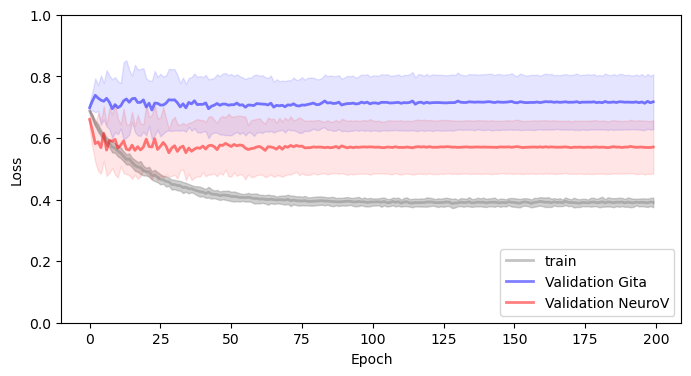

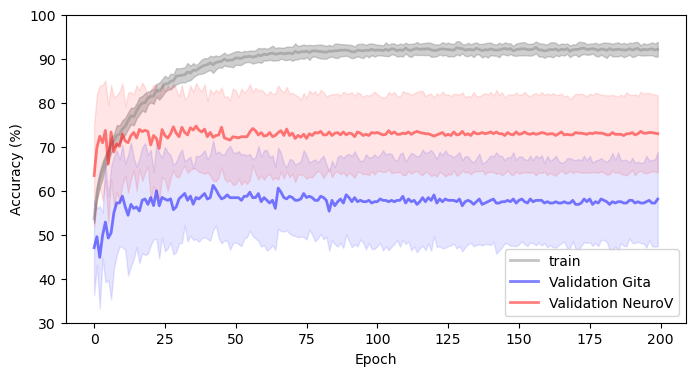

In [20]:
results_loss_Epochs_mean=np.stack(results_loss_Epochs,0).mean(axis=0)
results_loss_Epochs_std=np.stack(results_loss_Epochs,0).std(axis=0)

results_val_loss_Gita_Epochs_mean=np.stack(results_val_loss_Gita_Epochs,0).mean(axis=0)
results_val_loss_Gita_Epochs_std=np.stack(results_val_loss_Gita_Epochs,0).std(axis=0)

results_val_loss_NeuroV_Epochs_mean=np.stack(results_val_loss_NeuroV_Epochs,0).mean(axis=0)
results_val_loss_NeuroV_Epochs_std=np.stack(results_val_loss_NeuroV_Epochs,0).std(axis=0)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(epoch+1),results_loss_Epochs_mean, alpha=0.5, color='#888888', label='train', linewidth = 2.0)
ax.fill_between(range(epoch+1), results_loss_Epochs_mean - results_loss_Epochs_std, results_loss_Epochs_mean + results_loss_Epochs_std, color='#888888', alpha=0.4)

ax.plot(range(epoch+1),results_val_loss_Gita_Epochs_mean, alpha=0.5, color='blue', label='Validation Gita', linewidth = 2.0)
ax.fill_between(range(epoch+1), results_val_loss_Gita_Epochs_mean - results_val_loss_Gita_Epochs_std, results_val_loss_Gita_Epochs_mean + results_val_loss_Gita_Epochs_std, color='blue', alpha=0.1)

ax.plot(range(epoch+1),results_val_loss_NeuroV_Epochs_mean, alpha=0.5, color='red', label='Validation NeuroV', linewidth = 2.0)
ax.fill_between(range(epoch+1), results_val_loss_NeuroV_Epochs_mean - results_val_loss_NeuroV_Epochs_std, results_val_loss_NeuroV_Epochs_mean + results_val_loss_NeuroV_Epochs_std, color='red', alpha=0.1)


ax.set_ylim([0,1])
ax.legend(loc='lower right')
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
plt.savefig("Loss_Train_Validation.pdf", dpi=150)

results_metric_Epochs_mean=np.stack(results_metric_Epochs,0).mean(axis=0)
results_metric_Epochs_std=np.stack(results_metric_Epochs,0).std(axis=0)

results_val_metric_Gita_Epochs_mean=np.stack(results_val_metric_Gita_Epochs,0).mean(axis=0)
results_val_metric_Gita_Epochs_std=np.stack(results_val_metric_Gita_Epochs,0).std(axis=0)

results_val_metric_NeuroV_Epochs_mean=np.stack(results_val_metric_NeuroV_Epochs,0).mean(axis=0)
results_val_metric_NeuroV_Epochs_std=np.stack(results_val_metric_NeuroV_Epochs,0).std(axis=0)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(range(epoch+1),results_metric_Epochs_mean, alpha=0.5, color='#888888', label='train', linewidth = 2.0)
ax.fill_between(range(epoch+1), results_metric_Epochs_mean - results_metric_Epochs_std, results_metric_Epochs_mean + results_metric_Epochs_std, color='#888888', alpha=0.4)

ax.plot(range(epoch+1),results_val_metric_Gita_Epochs_mean, alpha=0.5, color='blue', label='Validation Gita', linewidth = 2.0)
ax.fill_between(range(epoch+1), results_val_metric_Gita_Epochs_mean - results_val_metric_Gita_Epochs_std, results_val_metric_Gita_Epochs_mean + results_val_metric_Gita_Epochs_std, color='blue', alpha=0.1)

ax.plot(range(epoch+1),results_val_metric_NeuroV_Epochs_mean, alpha=0.5, color='red', label='Validation NeuroV', linewidth = 2.0)
ax.fill_between(range(epoch+1), results_val_metric_NeuroV_Epochs_mean - results_val_metric_NeuroV_Epochs_std, results_val_metric_NeuroV_Epochs_mean + results_val_metric_NeuroV_Epochs_std, color='red', alpha=0.1)


ax.set_ylim([30,100])
ax.legend(loc='lower right')

ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Epoch")
plt.savefig("Accuracy_Train_Validation.pdf", dpi=150)

In [21]:
print(f'Gita: Accuracy by windows:, {np.mean(val_windows_metrics_Gita):.2f} ({np.std(val_windows_metrics_Gita):.2f})%,Accuracy by subject:{np.mean(val_subject_metrics_Gita):.2f} ({np.std(val_subject_metrics_Gita):.2f})') 
print(f'NeuroV: Accuracy by windows:, {np.mean(val_windows_metrics_NeuroV):.2f} ({np.std(val_windows_metrics_NeuroV):.2f})%,Accuracy by subject:{np.mean(val_subject_metrics_NeuroV):.2f} ({np.std(val_subject_metrics_NeuroV):.2f})') 
print(f'German: Accuracy by windows:, {np.mean(val_windows_metrics_German):.2f} ({np.std(val_windows_metrics_German):.2f})%,Accuracy by subject:{np.mean(val_subject_metrics_German):.2f} ({np.std(val_subject_metrics_German):.2f})') 
print(f'Czech: Accuracy by windows:, {np.mean(val_windows_metrics_Czech):.2f} ({np.std(val_windows_metrics_Czech):.2f})%,Accuracy by subject:{np.mean(val_subject_metrics_Czech):.2f} ({np.std(val_subject_metrics_Czech):.2f})') 


Gita: Accuracy by windows:, 58.11 (10.69)%,Accuracy by subject:64.12 (13.06)
NeuroV: Accuracy by windows:, 72.96 (8.76)%,Accuracy by subject:76.50 (10.80)
German: Accuracy by windows:, 58.25 (10.85)%,Accuracy by subject:63.99 (8.45)
Czech: Accuracy by windows:, 63.41 (9.67)%,Accuracy by subject:61.67 (13.84)


In [22]:
def KLdivergence(x, y):
#  """Compute the Kullback-Leibler divergence between two multivariate samples.
#  Parameters
#  ----------
#  x : 2D array (n,d)
#    Samples from distribution P, which typically represents the true
#    distribution.
#  y : 2D array (m,d)
#    Samples from distribution Q, which typically represents the approximate
#    distribution.
#  Returns
#  -------
#  out : float
#    The estimated Kullback-Leibler divergence D(P||Q).
#  References
#  ----------
#  Pérez-Cruz, F. Kullback-Leibler divergence estimation of
#continuous distributions IEEE International Symposium on Information
#Theory, 2008.
#  """
  from scipy.spatial import cKDTree as KDTree

  # Check the dimensions are consistent
  x = np.atleast_2d(x)
  y = np.atleast_2d(y)

  n,d = x.shape
  m,dy = y.shape

  assert(d == dy)


  # Build a KD tree representation of the samples and find the nearest neighbour
  # of each point in x.
  xtree = KDTree(x)
  ytree = KDTree(y)

  # Get the first two nearest neighbours for x, since the closest one is the
  # sample itself.
  r = xtree.query(x, k=2, eps=.01, p=2)[0][:,1]
  s = ytree.query(x, k=1, eps=.01, p=2)[0]

  # There is a mistake in the paper. In Eq. 14, the right side misses a negative sign
  # on the first term of the right hand side.
  return -np.log(r/s).sum() * d / n + np.log(m / (n - 1.))

In [23]:
def compute_kl(features_1, label_1, features_2, label_2):
    KL_HC_1=[]
    KL_PD_1=[]
    KL_HC_2=[]
    KL_PD_2=[]

    for k in range(10):
        KL_HC_1.append(KLdivergence(features_1[k].data.cpu()[np.where(label_1[k]==0)], features_2[k].data.cpu()[np.where(label_2[k]==0)]))
        KL_HC_2.append(KLdivergence(features_2[k].data.cpu()[np.where(label_2[k]==0)], features_1[k].data.cpu()[np.where(label_1[k]==0)]))

        KL_PD_1.append(KLdivergence(features_1[k].data.cpu()[np.where(label_1[k]==1)], features_2[k].data.cpu()[np.where(label_2[k]==1)]))
        KL_PD_2.append(KLdivergence(features_2[k].data.cpu()[np.where(label_2[k]==1)], features_1[k].data.cpu()[np.where(label_1[k]==1)]))
        
    print(f'KL para HC, {np.mean([KL_HC_1, KL_HC_2]):.2f} ({np.std([KL_HC_1, KL_HC_2]):.2f})')
    print(f'KL para PD, {np.mean([KL_PD_1, KL_PD_2]):.2f} ({np.std([KL_PD_1, KL_PD_2]):.2f})')

In [24]:
print('Gita-NeuroV')
compute_kl(flattern_output_CNN_Gita, Y_val_Gita_fold, flattern_output_CNN_NeuroV, Y_val_NeuroV_fold)
print('Gita-German')
compute_kl(flattern_output_CNN_Gita, Y_val_Gita_fold, flattern_output_CNN_German, Y_val_German_fold)
print('Gita-Czech')
compute_kl(flattern_output_CNN_Gita, Y_val_Gita_fold, flattern_output_CNN_Czech, Y_val_Czech_fold)
print('NeuroV-German')
compute_kl(flattern_output_CNN_German, Y_val_German_fold, flattern_output_CNN_NeuroV, Y_val_NeuroV_fold)
print('NeuroV-Czech')
compute_kl(flattern_output_CNN_Czech, Y_val_Czech_fold, flattern_output_CNN_NeuroV, Y_val_NeuroV_fold)
print('German-Czech')
compute_kl(flattern_output_CNN_German, Y_val_German_fold, flattern_output_CNN_Czech, Y_val_Czech_fold)

Gita-NeuroV
KL para HC, 6.44 (6.68)
KL para PD, 8.88 (8.12)
Gita-German
KL para HC, 3.25 (5.72)
KL para PD, 5.69 (6.65)
Gita-Czech
KL para HC, 3.69 (6.91)
KL para PD, 4.20 (7.08)
NeuroV-German
KL para HC, 6.67 (3.85)
KL para PD, 6.34 (2.46)
NeuroV-Czech
KL para HC, 7.05 (3.82)
KL para PD, 5.59 (3.41)
German-Czech
KL para HC, 3.55 (2.01)
KL para PD, 5.63 (2.47)


In [25]:
Cov_HC, Cov_PD=[],[]
for k in range(10):
    Gita_features_HC=flattern_output_CNN_Gita[k].data.cpu()[np.where(Y_val_Gita_fold[k]==0)]
    NeuroV_features_HC=flattern_output_CNN_NeuroV[k].data.cpu()[np.where(Y_val_NeuroV_fold[k]==0)]
    German_features_HC=flattern_output_CNN_German[k].data.cpu()[np.where(Y_val_German_fold[k]==0)]
    Czech_features_HC=flattern_output_CNN_Czech[k].data.cpu()[np.where(Y_val_Czech_fold[k]==0)]
    
    Gita_features_PD=flattern_output_CNN_Gita[k].data.cpu()[np.where(Y_val_Gita[k]==1)]
    NeuroV_features_PD=flattern_output_CNN_NeuroV[k].data.cpu()[np.where(Y_val_NeuroV_fold[k]==1)]
    German_features_PD=flattern_output_CNN_German[k].data.cpu()[np.where(Y_val_German[k]==1)]
    Czech_features_PD=flattern_output_CNN_Czech[k].data.cpu()[np.where(Y_val_Czech_fold[k]==1)]

    features_HC=torch.concat([Gita_features_HC, NeuroV_features_HC, German_features_HC, Czech_features_HC])
    features_PD=torch.concat([Gita_features_PD, NeuroV_features_PD, German_features_PD, Czech_features_PD ])
    Cov_HC.append(np.trace(np.cov(np.transpose(features_HC))))
    Cov_PD.append(np.trace(np.cov(np.transpose(features_PD))))

print(f'Cov para HC, {np.mean(Cov_HC):.2f} ({np.std(Cov_HC):.2f})')
print(f'Cov para PD, {np.mean(Cov_PD):.2f} ({np.std(Cov_PD):.2f})')



Cov para HC, 2.56 (0.37)
Cov para PD, 2.42 (0.76)


In [28]:
def plot_embedding_1(X, y, d, title=None, legend=None):
    """Plot an embedding X with the class label y colored by the domain d."""
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    colores=[(0,0.6,1), (0,0,1), (1,0.5,0.5), (1,0,0),  (0,1,0), (0.05,0.5,0.1), (0.7,0.4,1) , (0.2, 0, 0.4) ]
   
    for i in range(X.shape[0]):
        
        plt.plot(X[i, 0], X[i, 1], '.',
                 color=colores[y[i]], markersize=4 #plt.cm.brw(y[i]),
                  )
         
    plt.xticks([]), plt.yticks([])
    if legend is not None:
        plt.legend(['Gita_HC', 'Gita_PD', 'NeuroV_HC', 'NeuroV_PD', 'German_HC', 'German_PD',  'Czech_HC', 'Czech_PD'] )
        ax = plt.gca()
        leg = ax.get_legend()
        leg.legend_handles[0].set_color((0,0.6,1))
        leg.legend_handles[1].set_color((0,0,1))
        leg.legend_handles[2].set_color((1,0.5,0.5))
        leg.legend_handles[3].set_color((1,0,0))
        leg.legend_handles[4].set_color((0,1,0))
        leg.legend_handles[5].set_color((0.05,0.5,0.1))
        leg.legend_handles[6].set_color((0.7,0.4,1))
        leg.legend_handles[7].set_color((0.2, 0, 0.4)) 
    if title is not None:
        plt.title(title)

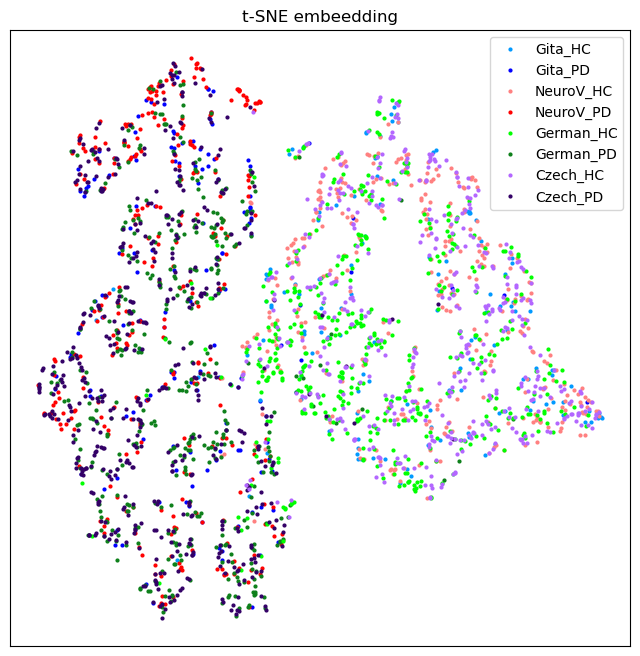

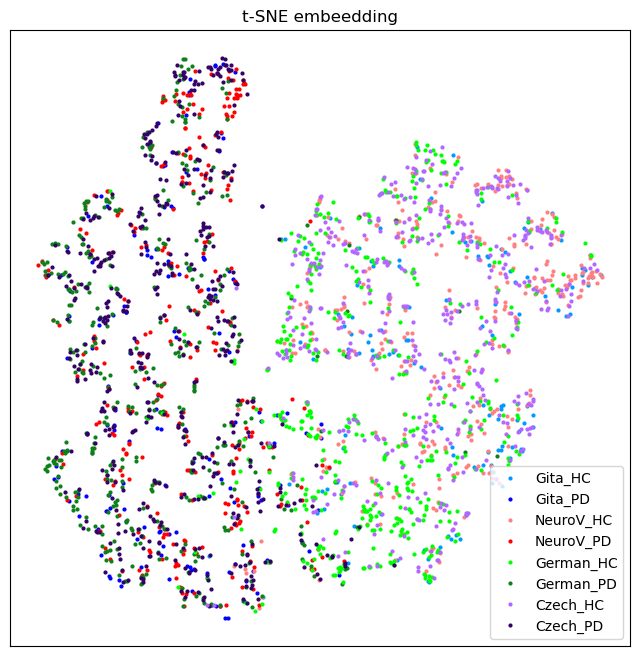

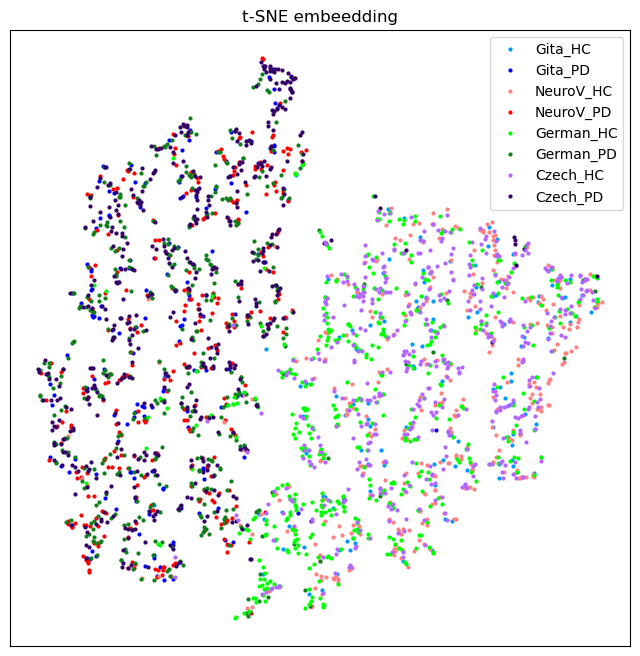

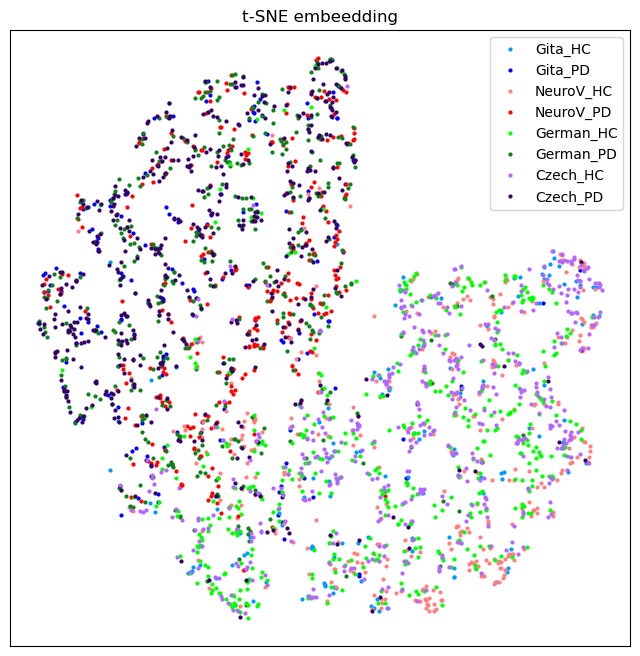

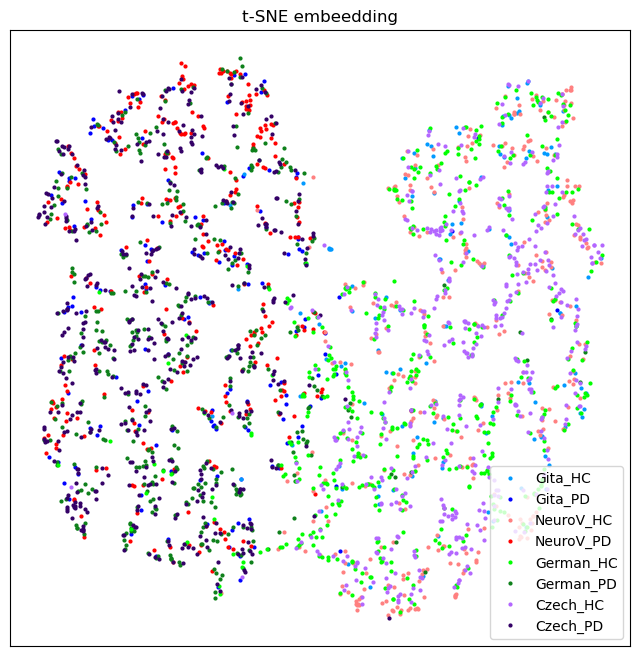

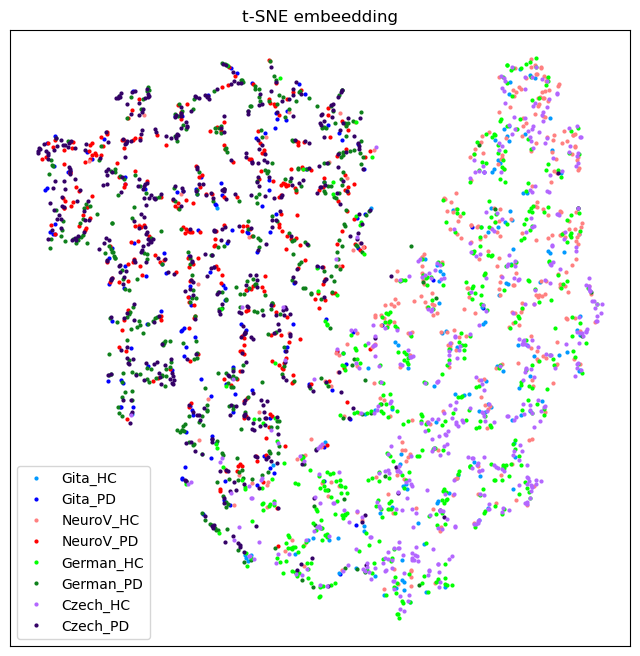

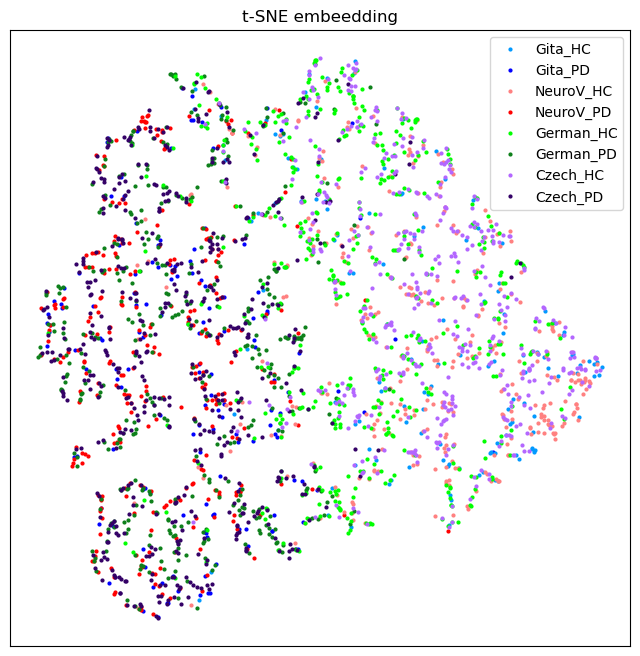

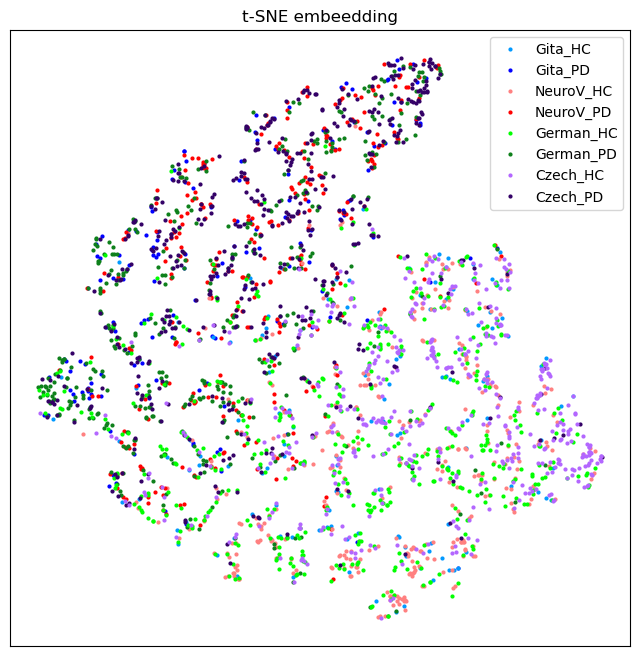

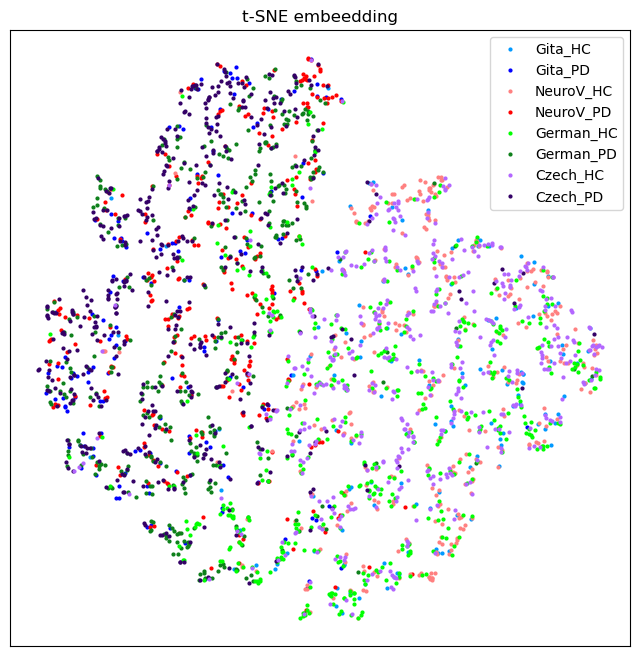

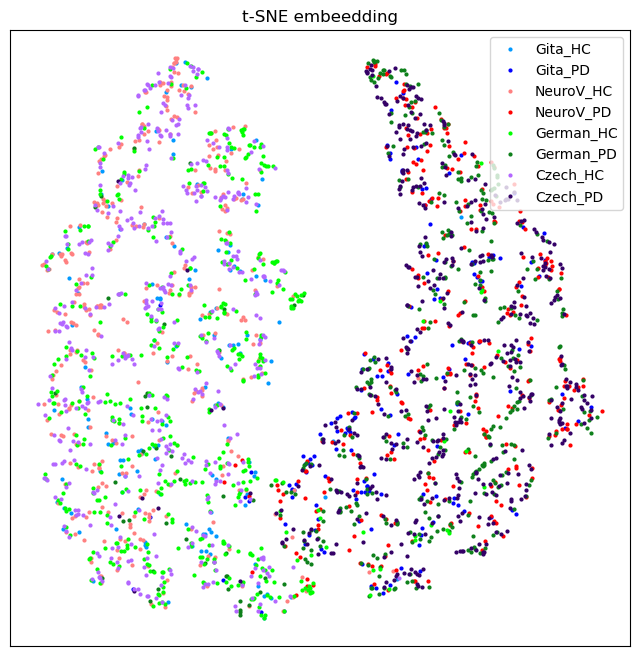

In [29]:
t_SNE= TSNE(n_components=2,n_iter=500,n_iter_without_progress=150, n_jobs=2, random_state=0)

for k in range(10):
    CCN_train=np.concatenate([flattern_train_CNN_Gita[k].data.cpu(), flattern_train_CNN_NeuroV[k].data.cpu(), flattern_train_CNN_German[k].data.cpu(), flattern_train_CNN_Czech[k].data.cpu()])
    Y_train=np.concatenate([Y_train_Gita_fold[k].data.cpu(), Y_train_NeuroV_fold[k].data.cpu(), Y_train_German_fold[k].data.cpu(), Y_train_Czech_fold[k].data.cpu()])
    Y_train_plot=np.concatenate([Y_train_Gita_fold[k].data.cpu(), Y_train_NeuroV_fold[k].data.cpu()+2, Y_train_German_fold[k].data.cpu()+4,Y_train_Czech_fold[k].data.cpu()+6])   
    domain_train=np.concatenate([np.zeros(Y_train_Gita_fold[k].shape), np.ones( Y_train_NeuroV_fold[k].shape), np.ones( Y_train_German_fold[k].shape)*2, np.ones( Y_train_Czech_fold[k].shape)*3])

    projections=t_SNE.fit_transform(CCN_train,Y_train)
    plt.figure(figsize=(8,8))   
    plot_embedding_1(projections,Y_train_plot,domain_train, 't-SNE embeedding', 'True')
   
    plt.show()

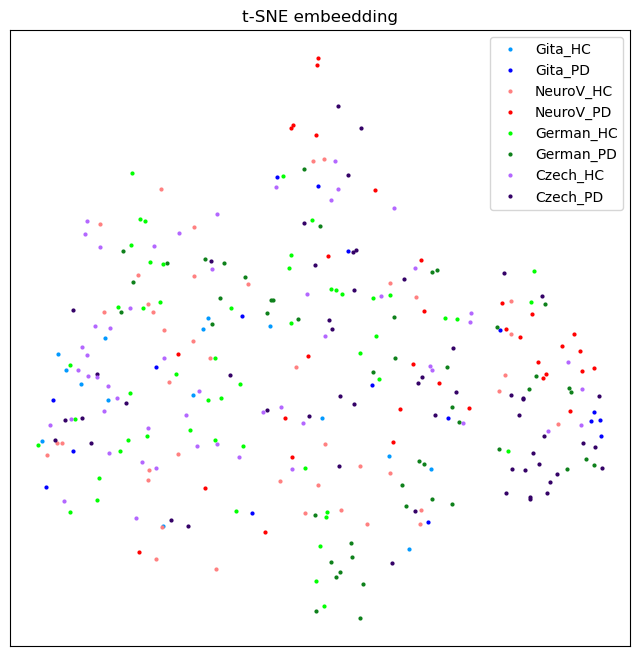

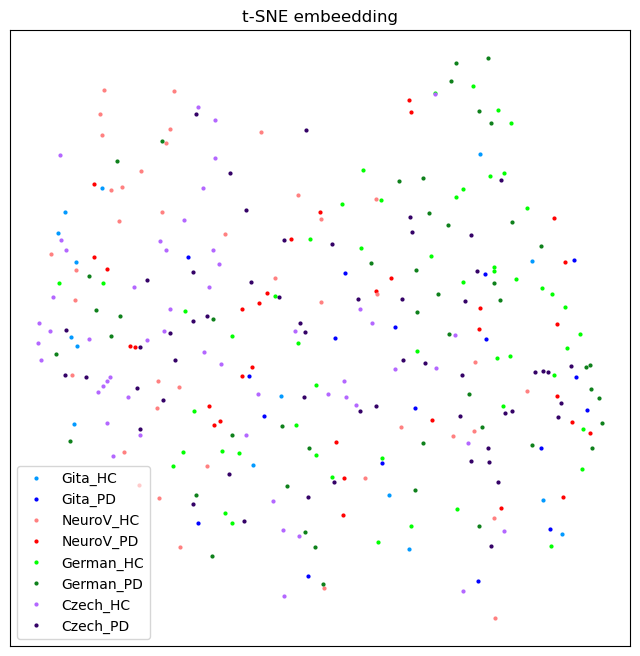

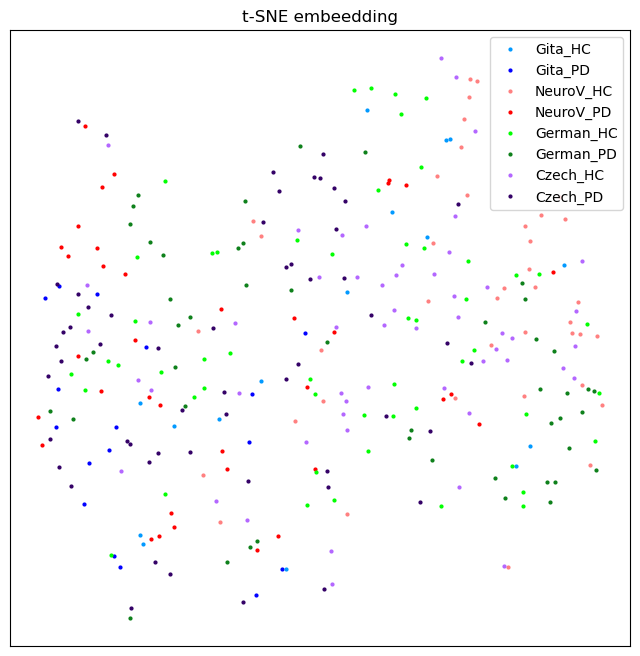

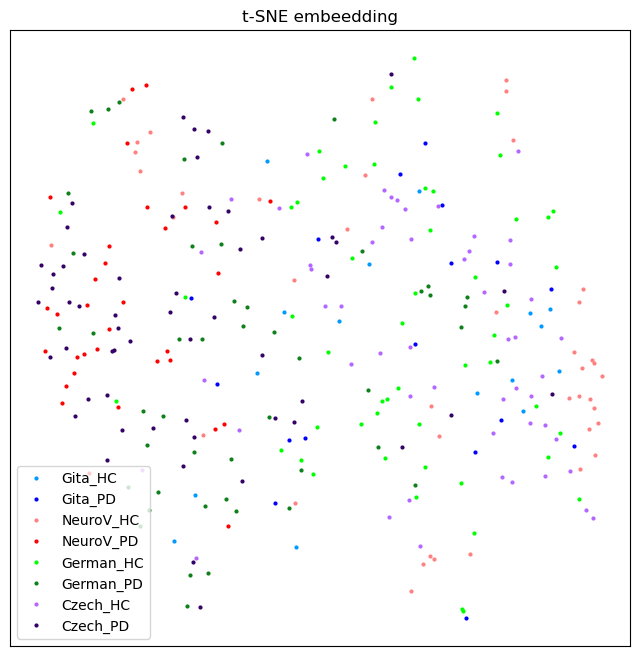

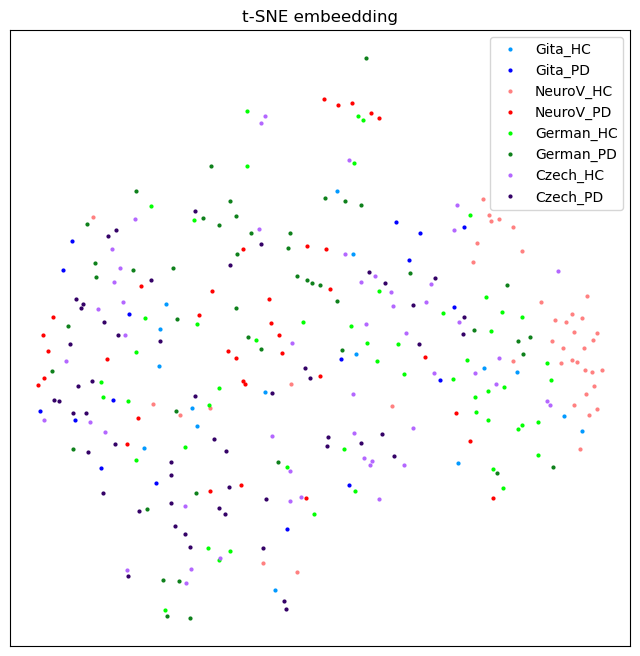

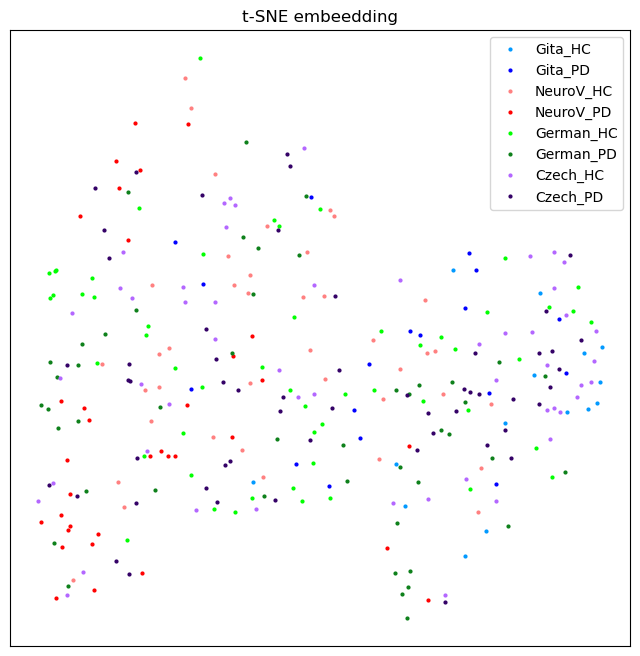

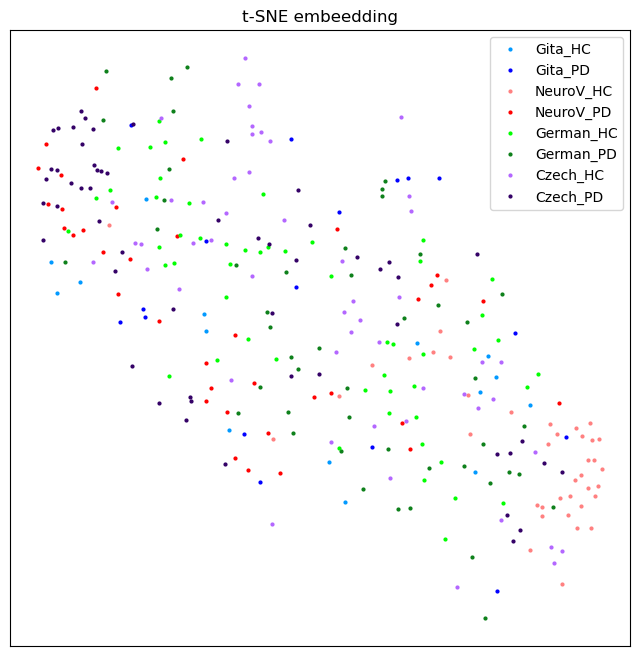

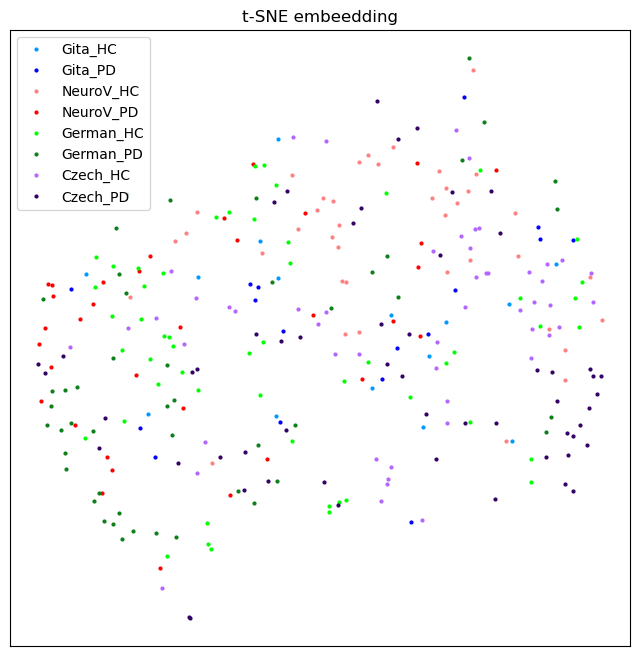

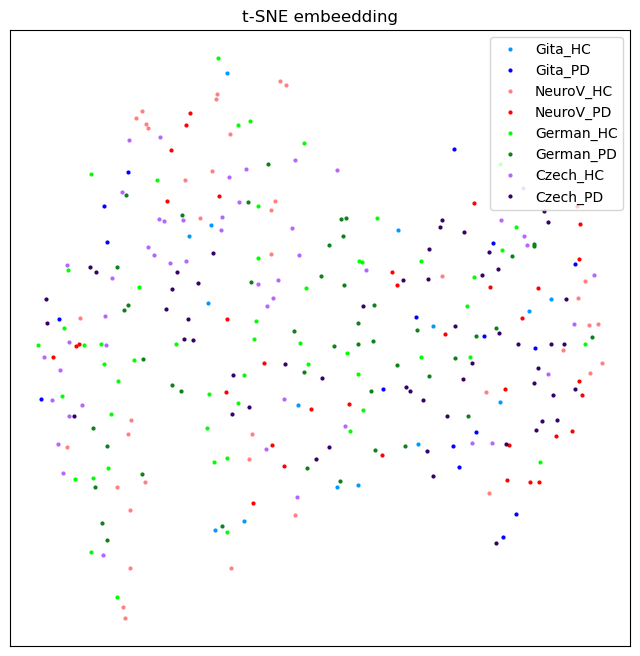

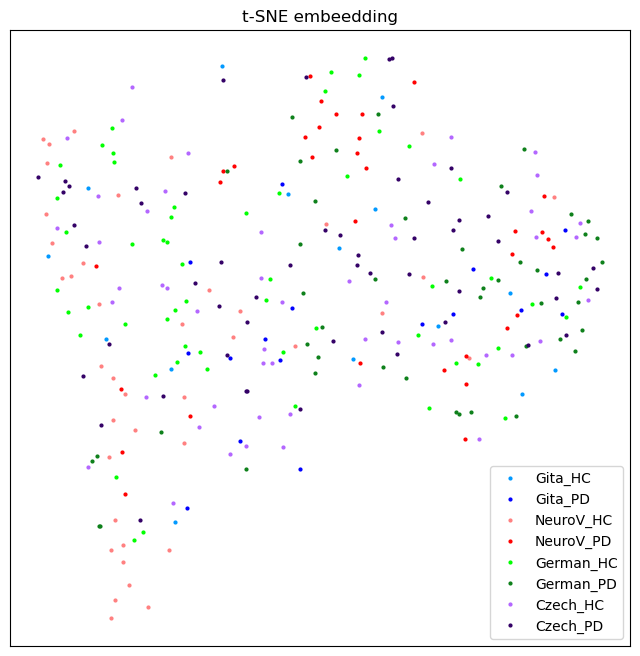

In [30]:
for k in range(10):
    CCN_out=np.concatenate([flattern_output_CNN_Gita[k].data.cpu(), flattern_output_CNN_NeuroV[k].data.cpu(), flattern_output_CNN_German[k].data.cpu(), flattern_output_CNN_Czech[k].data.cpu()])
    Y_test=np.concatenate([Y_val_Gita_fold[k], Y_val_NeuroV_fold[k], Y_val_German_fold[k], Y_val_Czech_fold[k]])
    Y_test_plot=np.concatenate([Y_val_Gita_fold[k], Y_val_NeuroV_fold[k]+2, Y_val_German_fold[k]+4, Y_val_Czech_fold[k]+6])   
    domain_test=np.concatenate([np.zeros(Y_val_Gita_fold[k].shape), np.ones( Y_val_NeuroV_fold[k].shape), np.ones( Y_val_German_fold[k].shape)*2, np.ones( Y_val_Czech_fold[k].shape)*3])
    projections=t_SNE.fit_transform(CCN_out,Y_test)
  
    plt.figure(figsize=(8,8))
    plot_embedding_1(projections,Y_test_plot,domain_test, 't-SNE embeedding', True)    